# The GE Analytics Engineer Case Study - Pneumoconiosis Detection

# 1. Introduction

## 1.1 Background

A leading hospital wishes to develop a screening program for coal miners, in order to facilitate early detection of Pneumoconiosis. The standard detection procedure involves taking a chest x-ray and examining it for abnormalities that indicate the onset of Pneumoconiosis. A typical doctor’s report divides each lung into three zones (upper, middle and lower) and labels them as normal/abnormal. However, due to the lack of trained doctors with expertise and the large number of patients to be screened, they have requested GE to develop a computer-aided detection system.

A team of image analysts have already developed algorithms to segment the lung and divide it into three zones. They have done this for a set of images where the doctor’s labeling for the lung zones is known, and characterized each lung zone in terms of a set of features. Each patient is identified by a unique patient number. The feature data for the various lung zones for each patient, along with the zone label (0=Normal, 1=Abnormal) is given in the attached Excel workbook. The workbook have separate tabs for each lung zone. Let's now import the workbook and see head of each one.


In [1]:
%matplotlib inline

import pandas as pd       #data structures and data analysis tools
import os                 #operating system interfaces

PATH = os.getcwd() + '/input/CollatedPneumoconiosisData-GE Internal.xlsx'       #Linux Path syntax
#PATH = os.getcwd() + '\\CollatedPneumoconiosisData-GE Internal.xlsx'           #Windows path syntax

df_RU = pd.read_excel(io = PATH, sheet_name = 'RightUpper')
df_RM = pd.read_excel(io = PATH, sheet_name = 'RightMiddle')
df_RL = pd.read_excel(io = PATH, sheet_name = 'RightLower')

df_LU = pd.read_excel(io = PATH, sheet_name = 'LeftUpper')
df_LM = pd.read_excel(io = PATH, sheet_name = 'LeftMiddle')
df_LL = pd.read_excel(io = PATH, sheet_name = 'LeftLower')

In [15]:
df_RU.head()

PatientNumMasked  Hist_0_0_0_Mean  Hist_0_0_0_Skewness  \
0               197      4237.293056             0.302492   
1               198      4256.916945             0.474074   
2               199      4296.291286             0.663791   
3               200      4203.653935             0.151689   
4               201      4115.922226             0.161238   

   Hist_0_0_0_Kurtosis  Hist_0_0_0_Entropy  Hist_2_45_1_Entropy  \
0            -0.784896            3.006215             2.603546   
1            -0.314716            2.903088             2.558727   
2             0.017994            2.887035             2.575735   
3            -0.349942            2.865957             2.514968   
4            -0.689184            3.021237             2.579903   

   Hist_2_60_1_Skewness  Hist_2_90_1_Skewness  Hist_2_90_1_Kurtosis  \
0             -0.844012             -0.483779              2.610553   
1             -0.329935             -0.127685              2.332722   
2             -0.848554             -0.454436              2.444789   
3             -0.098357             -0.143154              1.135831   
4             -0.812363             -0.347071              2.149007   

   Hist_2_135_1_Entropy     ...       Hist_2_180_2_Skewness  \
0              2.525187     ...                   -0.133637   
1              2.538430     ...                   -0.141520   
2              2.528932     ...                   -0.125736   
3              2.511736     ...                   -0.130681   
4              2.540464     ...                   -0.330209   

   Hist_2_180_2_Kurtosis  Hist_2_180_2_Entropy  \
0               0.803728              2.522425   
1               0.996574              2.503911   
2               0.997392              2.506426   
3               0.455011              2.501128   
4               0.336290              2.549366   

   CoMatrix_Deg45_Local_Homogeneity  CoMatrix_Deg90_Local_Homogeneity  \
0                          0.761836                          0.811605   
1                          0.781100                          0.815273   
2                          0.780047                          0.816601   
3                          0.772919                          0.818475   
4                          0.750336                          0.812935   

   CoMatrix_Deg135_Local_Homogeneity  CoMatrix_Deg135_Correlation  \
0                           0.776029                     0.025974   
1                           0.782717                     0.040575   
2                           0.787740                     0.037512   
3                           0.771237                     0.056834   
4                           0.757468                     0.028074   

   CoMatrix_Deg135_Inertia  Label         Zone  
0                 0.003850      0  Right Upper  
1                 0.004660      0  Right Upper  
2                 0.004691      0  Right Upper  
3                 0.006066      0  Right Upper  
4                 0.004624      0  Right Upper  

[5 rows x 42 columns]

In [16]:
df_RM.head()

PatientNumMasked  Hist_0_0_0_Mean  Hist_0_0_0_Skewness  \
0               197      4100.720909             0.759139   
1               198      4162.305129             1.214189   
2               199      4263.313578             0.917710   
3               200      4064.870768             0.874317   
4               201      3983.840318             1.104822   

   Hist_0_0_0_Kurtosis  Hist_0_0_0_Entropy  Hist_2_45_1_Entropy  \
0            -0.092024            2.976507             2.639656   
1             1.493646            2.918893             2.627956   
2             0.338200            2.981249             2.616469   
3             0.442318            3.019063             2.578380   
4             0.650220            3.030184             2.611743   

   Hist_2_60_1_Skewness  Hist_2_90_1_Skewness  Hist_2_90_1_Kurtosis  \
0             -0.611690             -0.440418              2.057042   
1             -0.471138             -0.184314              2.067929   
2             -0.480526             -0.240465              1.789279   
3             -0.429249             -0.252937              2.643526   
4             -0.526384             -0.279629              2.162807   

   Hist_2_135_1_Entropy      ...       Hist_2_180_2_Skewness  \
0              2.509450      ...                   -0.147357   
1              2.516346      ...                   -0.209139   
2              2.512599      ...                   -0.132885   
3              2.533544      ...                   -0.200787   
4              2.561242      ...                   -0.340285   

   Hist_2_180_2_Kurtosis  Hist_2_180_2_Entropy  \
0               0.633921              2.553195   
1               1.258152              2.554561   
2               0.707132              2.534681   
3               0.830786              2.533849   
4               1.563714              2.572108   

   CoMatrix_Deg45_Local_Homogeneity  CoMatrix_Deg90_Local_Homogeneity  \
0                          0.755948                          0.816385   
1                          0.767374                          0.818241   
2                          0.769503                          0.814599   
3                          0.762750                          0.818643   
4                          0.745181                          0.812783   

   CoMatrix_Deg135_Local_Homogeneity  CoMatrix_Deg135_Correlation  \
0                           0.783199                     0.032470   
1                           0.789900                     0.034591   
2                           0.790528                     0.024670   
3                           0.769872                     0.028494   
4                           0.754476                     0.024027   

   CoMatrix_Deg135_Inertia  Label          Zone  
0                 0.004728      0  Right Medium  
1                 0.005220      0  Right Medium  
2                 0.004019      0  Right Medium  
3                 0.004998      0  Right Medium  
4                 0.005782      0  Right Medium  

[5 rows x 42 columns]

In [17]:
df_RL.head()

PatientNumMasked  Hist_0_0_0_Mean  Hist_0_0_0_Skewness  \
0               197      3849.863796             1.204885   
1               198      4052.185408             1.643177   
2               199      4377.676011             0.234553   
3               200      4067.608855             1.181353   
4               201      4155.771084             0.939027   

   Hist_0_0_0_Kurtosis  Hist_0_0_0_Entropy  Hist_2_45_1_Entropy  \
0             2.160293            2.932870             2.634125   
1             3.137644            2.950368             2.635214   
2            -0.282208            2.699444             2.646302   
3             1.709616            2.946384             2.655172   
4             0.643182            2.984592             2.676364   

   Hist_2_60_1_Skewness  Hist_2_90_1_Skewness  Hist_2_90_1_Kurtosis  \
0             -0.287561             -0.010354              1.521959   
1              0.039501              0.297698              2.116360   
2             -0.103384              0.088316              2.171585   
3              0.494839              0.618671              4.617323   
4              0.406957              0.417678              2.202313   

   Hist_2_135_1_Entropy     ...       Hist_2_180_2_Skewness  \
0              2.512557     ...                   -0.168930   
1              2.517490     ...                   -0.222677   
2              2.510471     ...                   -0.100600   
3              2.554260     ...                   -0.124192   
4              2.596886     ...                   -0.137259   

   Hist_2_180_2_Kurtosis  Hist_2_180_2_Entropy  \
0               1.418190              2.604062   
1               1.744780              2.599821   
2               0.582136              2.561107   
3               0.857022              2.577196   
4               0.770067              2.611939   

   CoMatrix_Deg45_Local_Homogeneity  CoMatrix_Deg90_Local_Homogeneity  \
0                          0.757925                          0.831334   
1                          0.762692                          0.827607   
2                          0.758047                          0.807579   
3                          0.738893                          0.806232   
4                          0.724297                          0.798868   

   CoMatrix_Deg135_Local_Homogeneity  CoMatrix_Deg135_Correlation  \
0                           0.782183                     0.054143   
1                           0.788993                     0.030776   
2                           0.785645                     0.096652   
3                           0.758674                     0.039075   
4                           0.741076                     0.029628   

   CoMatrix_Deg135_Inertia  Label         Zone  
0                 0.006259      0  Right Lower  
1                 0.005342      0  Right Lower  
2                 0.007224      0  Right Lower  
3                 0.006422      0  Right Lower  
4                 0.005913      0  Right Lower  

[5 rows x 42 columns]

In [18]:
df_LU.head()

PatientNumMasked  Hist_0_0_0_Mean  Hist_0_0_0_Skewness  \
0               197      4363.008110             1.098236   
1               198      4318.186837             0.393097   
2               199      4151.775869             0.583942   
3               200      4155.684014             0.270359   
4               201      4130.056287             1.013720   

   Hist_0_0_0_Kurtosis  Hist_0_0_0_Entropy  Hist_2_45_1_Entropy  \
0             0.277292            3.001194             2.501977   
1            -0.629418            2.897165             2.514097   
2             0.027675            2.982208             2.527188   
3            -0.518127            2.978349             2.529073   
4             1.037294            2.971485             2.565980   

   Hist_2_60_1_Skewness  Hist_2_90_1_Skewness  Hist_2_90_1_Kurtosis  \
0             -0.159260             -0.384181              2.262304   
1             -0.241500             -0.352371              2.405546   
2             -0.209328             -0.429352              2.441376   
3             -0.174572             -0.433862              2.840223   
4             -0.044522             -0.172104              2.320988   

   Hist_2_135_1_Entropy     ...      Hist_2_180_2_Skewness  \
0              2.612565     ...                  -0.139364   
1              2.589534     ...                  -0.149112   
2              2.558262     ...                  -0.119556   
3              2.564757     ...                  -0.170776   
4              2.576747     ...                  -0.126741   

   Hist_2_180_2_Kurtosis  Hist_2_180_2_Entropy  \
0               0.897956              2.530422   
1               1.094034              2.524988   
2               1.195779              2.508727   
3               1.353766              2.526510   
4               0.632010              2.532105   

   CoMatrix_Deg45_Local_Homogeneity  CoMatrix_Deg90_Local_Homogeneity  \
0                          0.781615                          0.815016   
1                          0.787947                          0.819061   
2                          0.790724                          0.823469   
3                          0.775697                          0.816694   
4                          0.748654                          0.815555   

   CoMatrix_Deg135_Local_Homogeneity  CoMatrix_Deg135_Correlation  \
0                           0.761684                     0.013780   
1                           0.776234                     0.009369   
2                           0.787974                     0.009369   
3                           0.767836                     0.009369   
4                           0.747747                     0.009369   

   CoMatrix_Deg135_Inertia  Label        Zone  
0                 0.003998      0  Left Upper  
1                 0.004453      0  Left Upper  
2                 0.004059      0  Left Upper  
3                 0.004620      0  Left Upper  
4                 0.005800      0  Left Upper  

[5 rows x 42 columns]

In [19]:
df_LM.head()

PatientNumMasked  Hist_0_0_0_Mean  Hist_0_0_0_Skewness  \
0               197      4178.751775             1.226579   
1               198      4234.212606             1.340643   
2               199      4307.089548             0.935022   
3               200      4049.623520             0.967842   
4               201      4247.116890             1.114579   

   Hist_0_0_0_Kurtosis  Hist_0_0_0_Entropy  Hist_2_45_1_Entropy  \
0             1.258606            3.047016             2.504360   
1            -1.298570            2.948258             2.530878   
2             0.047617            2.996471             2.500525   
3             0.486825            3.040392             2.555323   
4             0.576144            3.011246             2.560456   

   Hist_2_60_1_Skewness  Hist_2_90_1_Skewness  Hist_2_90_1_Kurtosis  \
0             -0.123139             -0.287614              1.584757   
1              0.084333             -0.051551              1.154939   
2              0.032387             -0.228680              2.092978   
3             -0.298314             -0.385565              2.613643   
4             -0.075596             -0.174454              1.845406   

   Hist_2_135_1_Entropy     ...       Hist_2_180_2_Skewness  \
0              2.652639     ...                   -0.141835   
1              2.651489     ...                   -0.141068   
2              2.597963     ...                   -0.111054   
3              2.624857     ...                   -0.187776   
4              2.624185     ...                   -0.146664   

   Hist_2_180_2_Kurtosis  Hist_2_180_2_Entropy  \
0               0.931906              2.563453   
1               1.112558              2.579875   
2               0.962997              2.530614   
3               1.044348              2.568037   
4               0.957917              2.563048   

   CoMatrix_Deg45_Local_Homogeneity  CoMatrix_Deg90_Local_Homogeneity  \
0                          0.782007                          0.820765   
1                          0.784204                          0.822709   
2                          0.792274                          0.819553   
3                          0.773757                          0.817925   
4                          0.747337                          0.806940   

   CoMatrix_Deg135_Local_Homogeneity  CoMatrix_Deg135_Correlation  \
0                           0.752758                     0.017947   
1                           0.759814                     0.027450   
2                           0.774400                     0.018610   
3                           0.758970                     0.024452   
4                           0.735872                     0.018846   

   CoMatrix_Deg135_Inertia  Label         Zone  
0                 0.004539      0  Left Medium  
1                 0.005318      0  Left Medium  
2                 0.004154      0  Left Medium  
3                 0.004816      0  Left Medium  
4                 0.005436      0  Left Medium  

[5 rows x 42 columns]

In [20]:
df_LL.head()

PatientNumMasked  Hist_0_0_0_Mean  Hist_0_0_0_Skewness  \
0               197      3827.308609             1.581444   
1               198      3880.689451             1.884077   
2               199      4307.271555             0.385545   
3               200      4125.864028             0.638748   
4               201      4245.911610             1.495478   

   Hist_0_0_0_Kurtosis  Hist_0_0_0_Entropy  Hist_2_45_1_Entropy  \
0             2.313975            2.935877             2.492469   
1             4.481630            2.887707             2.533448   
2            -0.079652            2.659537             2.492129   
3            -0.726207            2.965364             2.520319   
4             2.368626            2.689544             2.538366   

   Hist_2_60_1_Skewness  Hist_2_90_1_Skewness  Hist_2_90_1_Kurtosis  \
0              0.283236              0.812305              4.536969   
1              0.325381              0.939575              0.679463   
2              0.344686              0.134869              1.484362   
3              0.562678              0.852044              3.960474   
4             -0.022939              0.034153              1.233378   

   Hist_2_135_1_Entropy     ...      Hist_2_180_2_Skewness  \
0              2.628974     ...                   0.021742   
1              2.644007     ...                  -0.150601   
2              2.636256     ...                  -0.122826   
3              2.639564     ...                  -0.137458   
4              2.658586     ...                  -0.035289   

   Hist_2_180_2_Kurtosis  Hist_2_180_2_Entropy  \
0               1.624539              2.604617   
1               1.872008              2.619019   
2               1.126629              2.574958   
3               0.987154              2.558380   
4               0.696180              2.590561   

   CoMatrix_Deg45_Local_Homogeneity  CoMatrix_Deg90_Local_Homogeneity  \
0                          0.776940                          0.834608   
1                          0.781288                          0.833986   
2                          0.790766                          0.818544   
3                          0.776881                          0.811480   
4                          0.745798                          0.804438   

   CoMatrix_Deg135_Local_Homogeneity  CoMatrix_Deg135_Correlation  \
0                           0.752797                     0.036247   
1                           0.758776                     0.047700   
2                           0.761822                     0.119794   
3                           0.751880                     0.029563   
4                           0.723260                     0.081364   

   CoMatrix_Deg135_Inertia  Label        Zone  
0                 0.007325      0  Left Lower  
1                 0.008369      0  Left Lower  
2                 0.009335      0  Left Lower  
3                 0.005706      0  Left Lower  
4                 0.012586      0  Left Lower  

[5 rows x 42 columns]

Data tables looks very simialar. First column is Patient ID, then we have numeric continuous values representing different independent variables and last column is label for dependend variable with patient condition. The independent variables are set of features processed from x-ray images by a team. Study instructions provide detailed description of available features.

## 1.2 Feature description

Each region of interest (lung zone) is characterized in terms of a set of features. Two types of features are extracted in order to describe each region of interest. These are described below:

### a) Intensity based
A set of 6 features are extracted based on the histogram of intensity values – mean, standard deviation, skewness, kurtosis, energy and entropy. Apart from calculating these on the original ROI, these features are also extracted after applying a difference filter on the image for the purpose of local enhancement. If I(x,y) denotes the image gray value at (x,y), the first and second order filters are defined as:

$$L_{1}^{\theta}(d) = f_{x}cos\theta + f_{y}sin\theta$$

$$L_{2}^{\theta}(d) = f_{xx}cos^{2}\theta + f_{yy}sin^{2}\theta + f_{x}cos\theta$$

where: 
- $d$ is the difference scale,
- $\theta$ is the orientation at which the difference is computed,
-$f_{x}$ and $f_{y}$ represent the first order difference,
- $f_{xx},f_{yy},f_{xy}$ represent the second order difference.
 
First and second order difference filter bank are used with given orientations $\theta\in\{0,30,35,60,90,120,135,150,180\}$ and given scale $d\in\{1,2\}$. 6 intensity-based features are calculated (mean, variance, skewness, kurtosis, energy, entropy) for each filtered image, along with the same features for the raw image without filtering, amounting to a total of 222 features. A subset of 34 features from this set has been provided in the data sheet. These features are labeled with the prefix $Hist\_d\_θ$.

### b) Co-occurrence matrix based
A set of 5 features are also extracted based on the gray level co-occurrence matrix computed for the ROI, namely energy, entropy, local homogeneity, correlation and inertia. The co-occurrence matrix allows to capture the level of similarity and dissimilarity among adjacent pixels in an ROI. Thus, an ROI with an opacity will contain adjacent pixels with similarly high intensities, whereas a normal ROI will not contain such adjacent pixels. Computing these features for various orientations $\delta=\{0,45,90,135\}$ captures this information for various types of adjacency. A subset of 5 of out of 25 such features has been provided in the attached data sheet. These features are labeled with the prefix $CoMatrix\_Deg\delta$.

## 2. Exploratory analysis

### 2.1 General overview of the data

The input data is stored in different data frame. The first step is to check if we have any empty or missing value and see what are frames shapes.

In [21]:
df_RU.isnull().values.any()

False

In [22]:
df_RM.isnull().values.any()

False

In [23]:
df_RL.isnull().values.any()

False

In [24]:
df_LU.isnull().values.any()

False

In [25]:
df_LM.isnull().values.any()

False

In [26]:
df_LL.isnull().values.any()

False

There are no missing values in the data frames. Next step is to see what are shapes of data frames.

In [27]:
RU_shape = df_RU.shape
RM_shape = df_RM.shape
RL_shape = df_RL.shape
LU_shape = df_LU.shape
LM_shape = df_LM.shape
LL_shape = df_LL.shape

print("Shape of Right Upper zone table is: ", RU_shape)
print("Shape of Right Middle zone table is: ", RM_shape)
print("Shape of Right Lower zone table is: ", RL_shape)
print("Shape of Left Upper zone table is: ", LU_shape)
print("Shape of Left Middle zone table is: ", LM_shape)
print("Shape of Left Lower zone table is: ", LL_shape)

Shape of Right Upper zone table is:  (397, 42)
Shape of Right Middle zone table is:  (470, 42)
Shape of Right Lower zone table is:  (446, 42)
Shape of Left Upper zone table is:  (392, 42)
Shape of Left Middle zone table is:  (467, 42)
Shape of Left Lower zone table is:  (434, 42)


For every lung zone we have the same number of columns, but the number of rows is different. To examine this let's check if there are any duplicates for patient IDs. We will also plot a histograms to see what is distribution of number of zones examined for each patient.

In [28]:
ids = df_RU['PatientNumMasked']
print('Right Upper data frame has', 
      len(df_RU[ids.isin(ids[ids.duplicated()])].sort_values('PatientNumMasked')), 
      'duplicates.')

Right Upper data frame has 0 duplicates.


In [29]:
ids = df_RM['PatientNumMasked']
print('Right Medium data frame has',
      len(df_RM[ids.isin(ids[ids.duplicated()])].sort_values('PatientNumMasked')),
      'duplicates.')

Right Medium data frame has 0 duplicates.


In [30]:
ids = df_RL['PatientNumMasked']
print('Right Lower data frame has', 
      len(df_RL[ids.isin(ids[ids.duplicated()])].sort_values('PatientNumMasked')), 
      'duplicates.')

Right Lower data frame has 0 duplicates.


In [31]:
ids = df_LU['PatientNumMasked']
print('Left Upper data frame has',
      len(df_LU[ids.isin(ids[ids.duplicated()])].sort_values('PatientNumMasked')),
      'duplicates.')

Left Upper data frame has 0 duplicates.


In [32]:
ids = df_LM['PatientNumMasked']
print('Left Medium data frame has',
      len(df_LM[ids.isin(ids[ids.duplicated()])].sort_values('PatientNumMasked')),
      'duplicates.')

Left Medium data frame has 0 duplicates.


In [33]:
ids = df_LL['PatientNumMasked']
print('Left Lower data frame has',
      len(df_LL[ids.isin(ids[ids.duplicated()])].sort_values('PatientNumMasked')),
      'duplicates.')

Left Lower data frame has 0 duplicates.


There are no duplicates, so there are patients that did not have exam for every lung zone. Histograms below are showing what is the distribution of data for each patient by lung zone

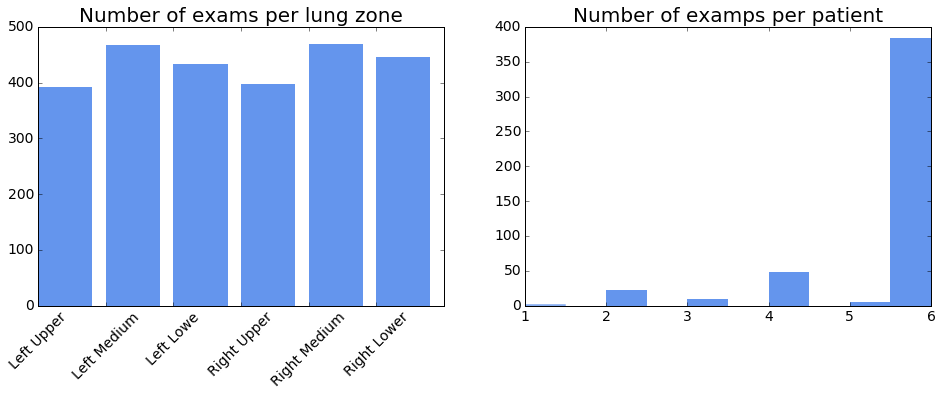

In [34]:
import numpy as np                       #linear algebra
import matplotlib.pyplot as plt          #plotting library
from matplotlib import gridspec

x1 = np.arange(6)
xt = ('Left Upper', 'Left Medium', 'Left Lowe',
     'Right Upper', 'Right Medium', 'Right Lower')
y1 = [LU_shape[0], LM_shape[0], LL_shape[0],
      RU_shape[0], RM_shape[0], RL_shape[0]]

df_temp = pd.concat([df_RU['PatientNumMasked'], df_RM['PatientNumMasked'], df_RL['PatientNumMasked'], 
                     df_LU['PatientNumMasked'], df_LM['PatientNumMasked'], df_LL['PatientNumMasked']], axis=0)
exam_counts = df_temp.value_counts()


fig = plt.figure(figsize=(16, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 3]) 
ax0 = plt.subplot(gs[0])
ax0.set_xticklabels(xt, fontdict=None, minor=False, fontsize=14)
plt.sca(ax0)
plt.xticks(rotation=45)
plt.yticks(fontsize=14)
ax0.set_title('Number of exams per lung zone', fontsize=20)
ax0.bar(x1, y1, color='cornflowerblue', linewidth=0)
ax1 = plt.subplot(gs[1])
ax1.hist(exam_counts, color='cornflowerblue', linewidth=0)
ax1.set_title('Number of examps per patient', fontsize=20)
plt.sca(ax1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

del df_temp            #delete objects that will not be used later
del exam_counts

Right and lung zone have similar data distribution. Medium zone of each lung have the most observations, and upper zone have least observations. Majority of patients have full exam of six lung zone.

At this point it is important to remember that Pneumoconiosis is labeled for every zone examined for a patient even if only one zone indicate a disease. This can be a problematic when building a model, since healthy zones are classified in training data as ill, when only one zone is ill.

Important apect of data for building predictive model is balance of data labels. Balanced classes don't need much attantion, while imbalanced classes need to be treated carefully.

In [35]:
print('Fraction of positive classes in Upper Left: ', len(df_LU[df_LU['Label']==1])/len(df_LU))
print('Fraction of positive classes in Medium Left: ', len(df_LM[df_LM['Label']==1])/len(df_LM))
print('Fraction of positive classes in Lower Left: ', len(df_LL[df_LL['Label']==1])/len(df_LL))
print('Fraction of positive classes in Upper Right: ', len(df_RU[df_RU['Label']==1])/len(df_RU))
print('Fraction of positive classes in Upper Medium: ', len(df_RM[df_RM['Label']==1])/len(df_RM))
print('Fraction of positive classes in Upper Left: ', len(df_RL[df_RL['Label']==1])/len(df_RL))

Fraction of positive classes in Upper Left:  0.29336734693877553
Fraction of positive classes in Medium Left:  0.4068522483940043
Fraction of positive classes in Lower Left:  0.3617511520737327
Fraction of positive classes in Upper Right:  0.3022670025188917
Fraction of positive classes in Upper Medium:  0.4106382978723404
Fraction of positive classes in Upper Left:  0.3789237668161435


Different lung zones yelds slightly different result, overall result is about 35% of positive class. Classes are imbalanced, but imbalance is not big. Depend on final scores, this might need to be adressed.

### 2.2 Univariate analysis

Univariate analysis is first step to get better understanding of independent variables. Provided data contain continuous numerical data. Section below will go into the features one by one. Total of 39 features will be analized to detect any outliers and to compare distributions between two dependent variables, central tendency and spread of the independent variable. Different lung zones will be analized separatelly.

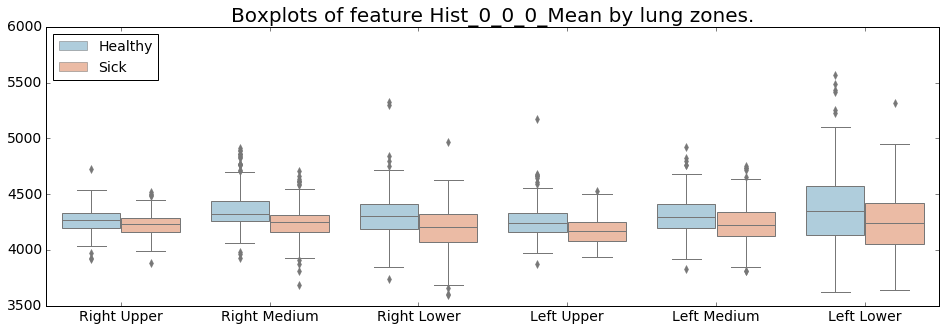

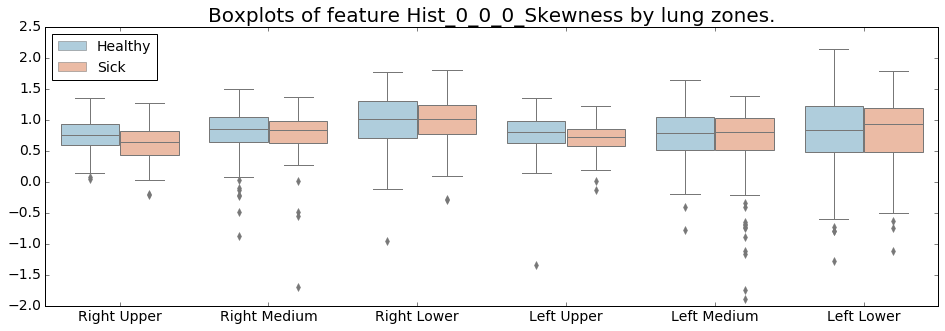

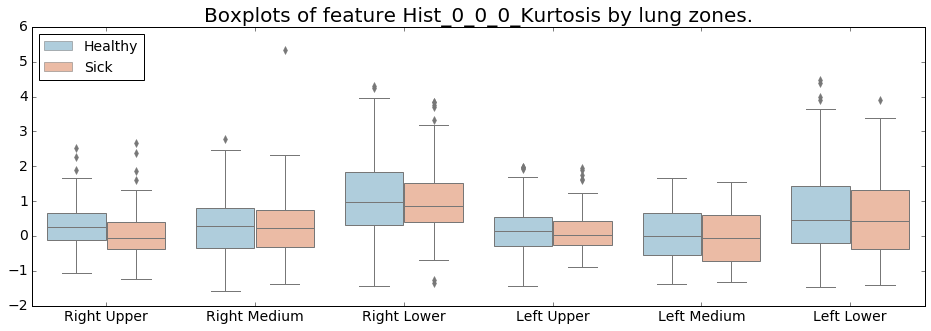

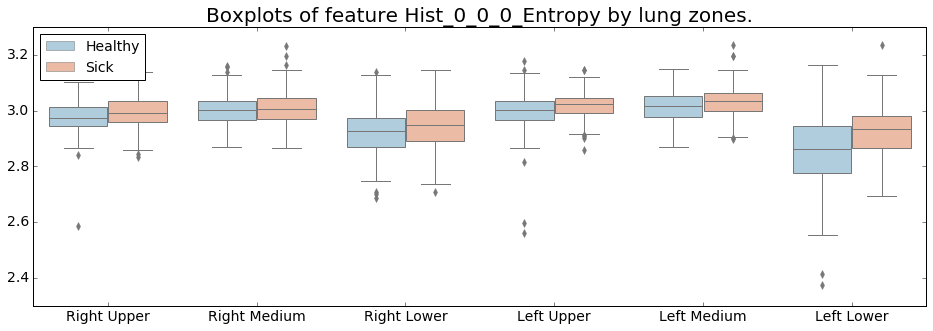

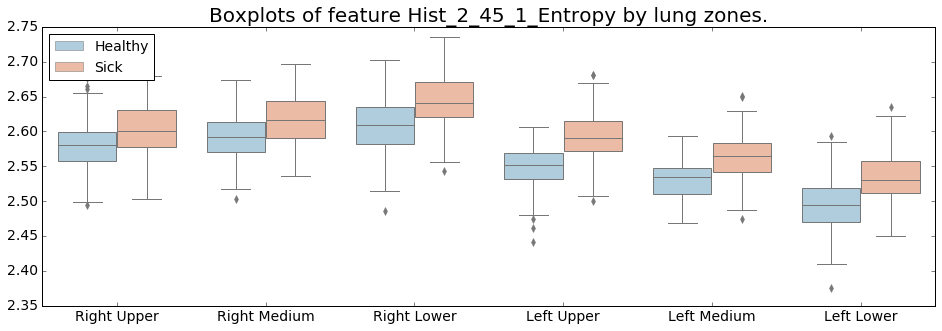

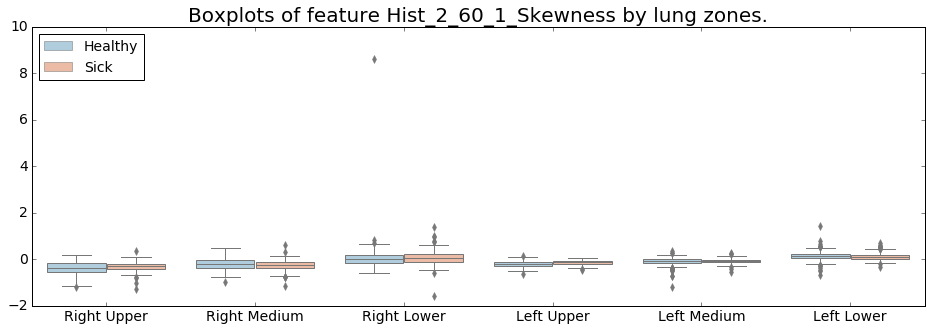

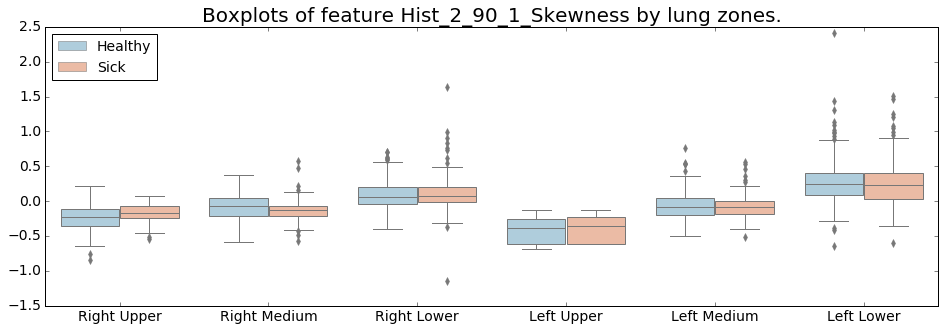

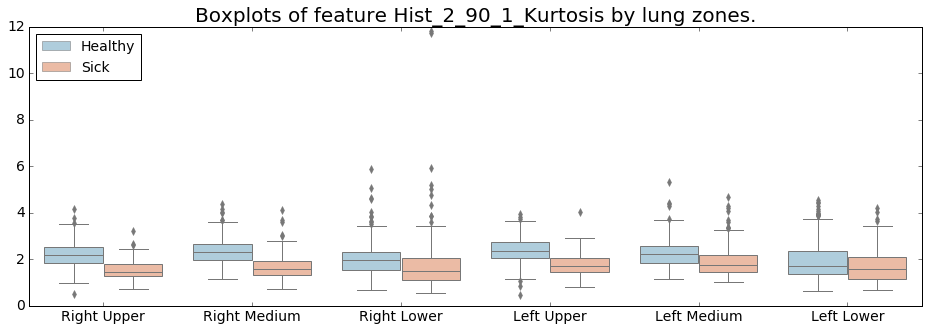

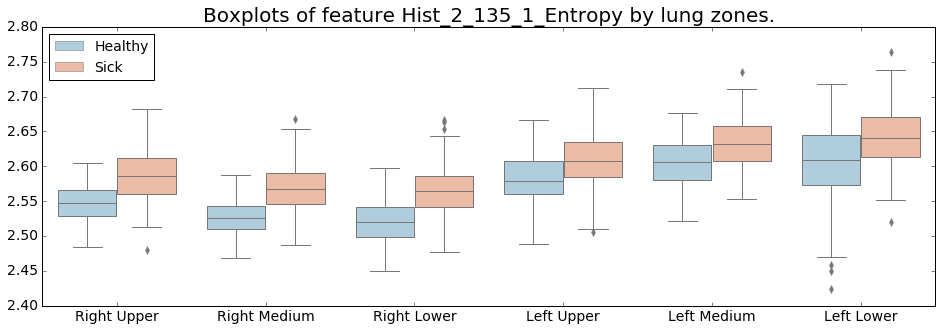

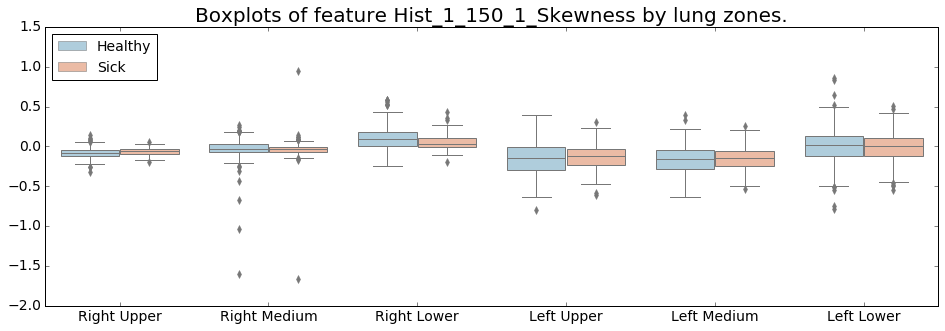

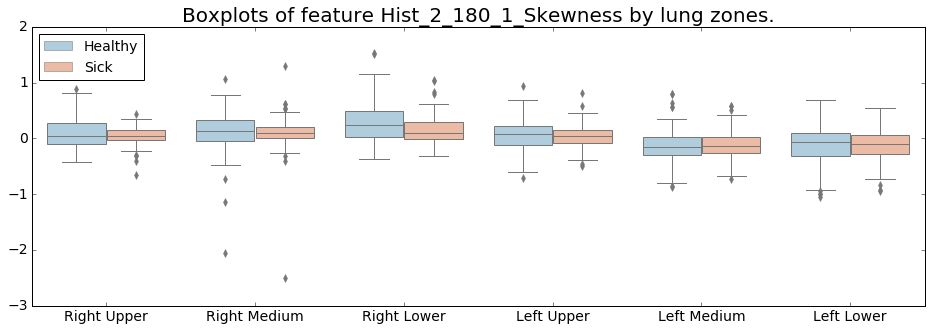

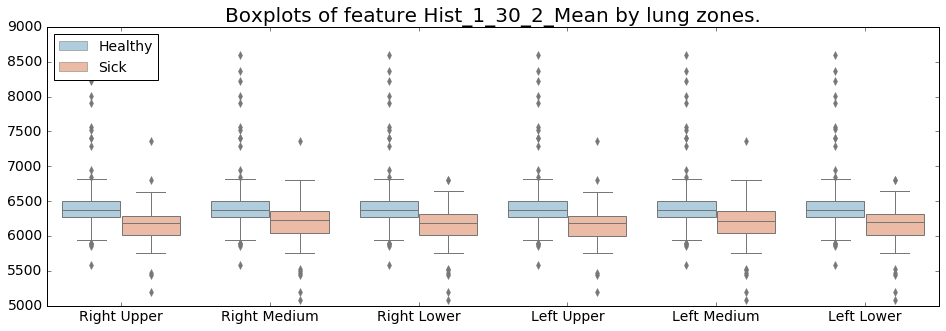

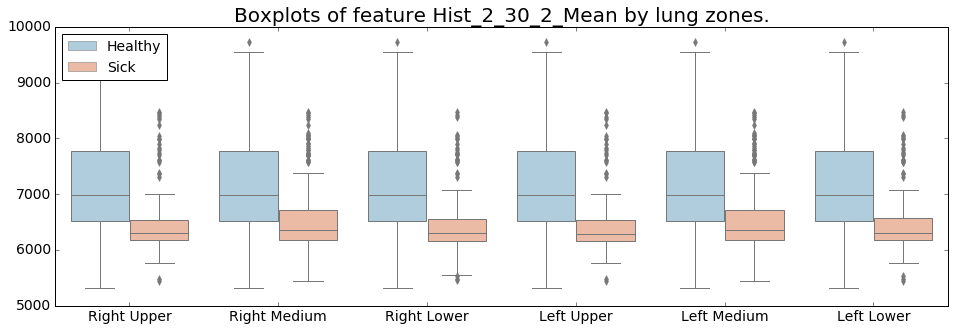

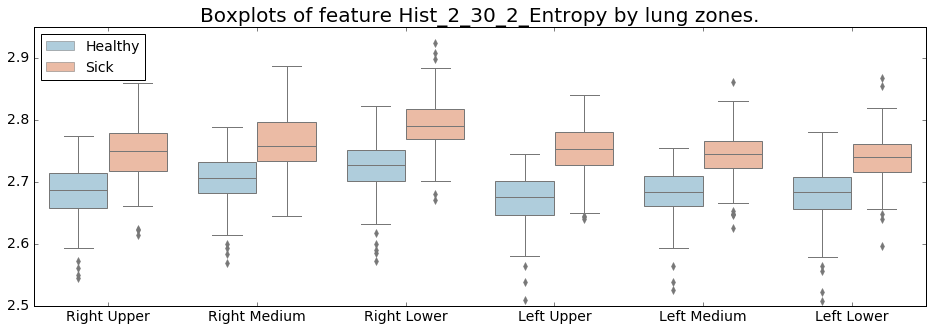

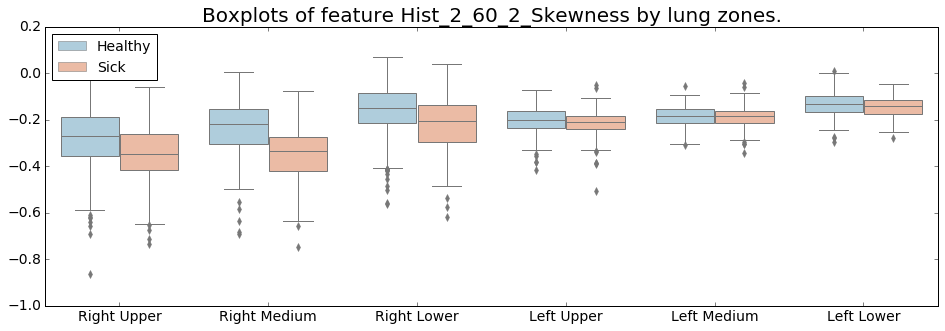

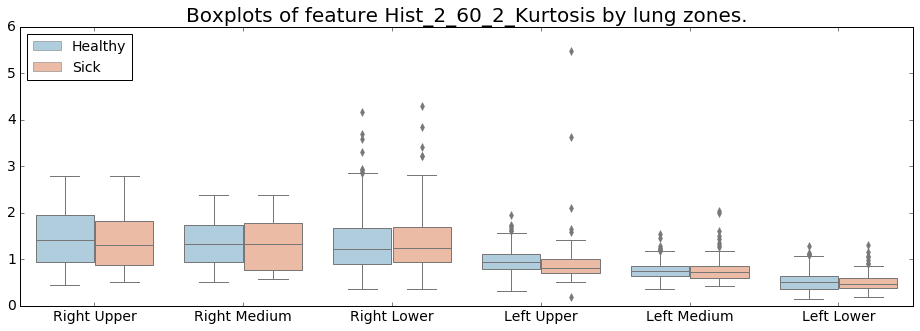

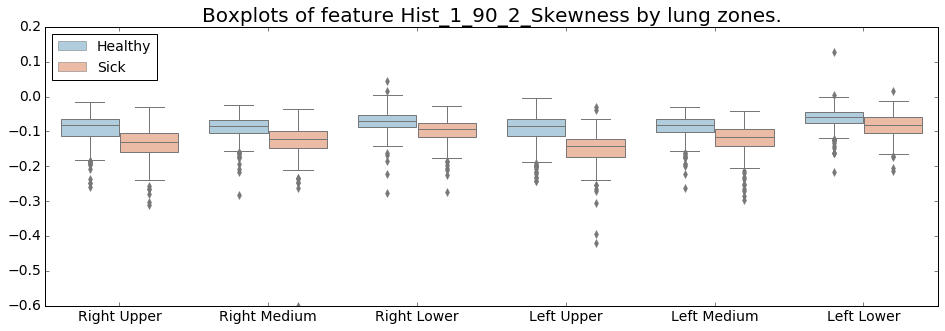

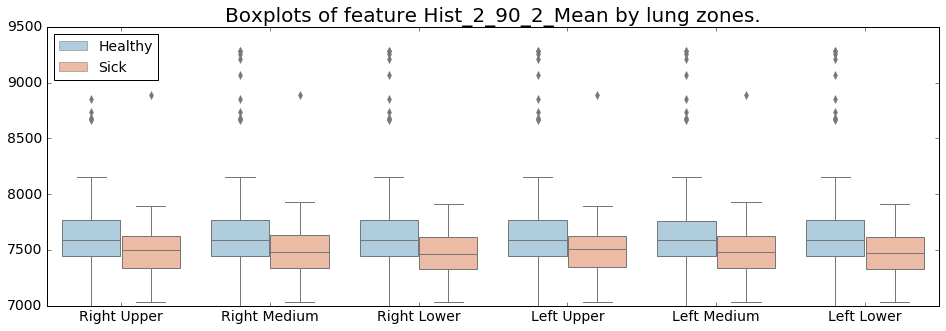

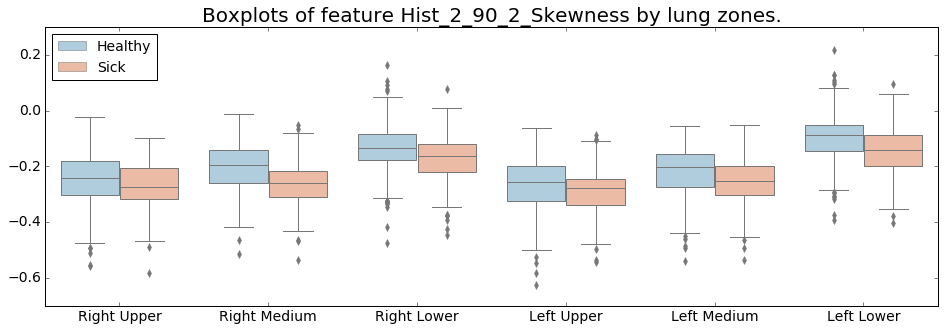

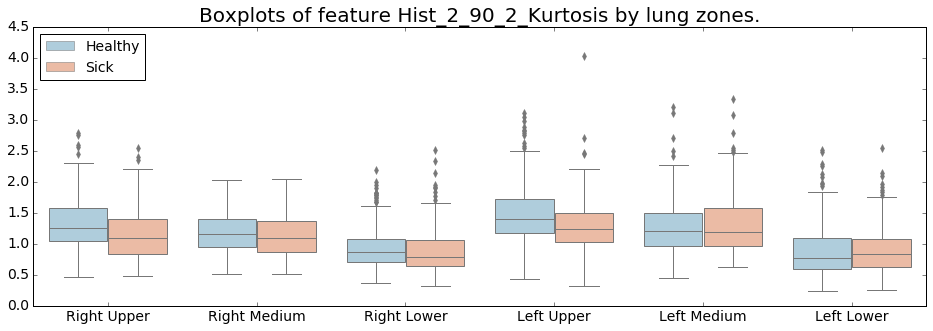

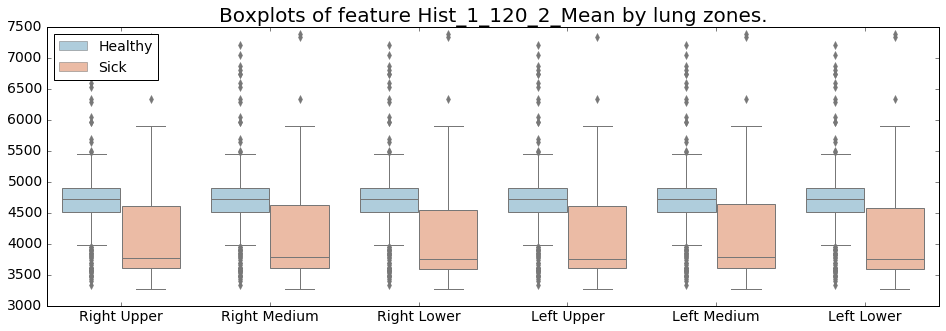

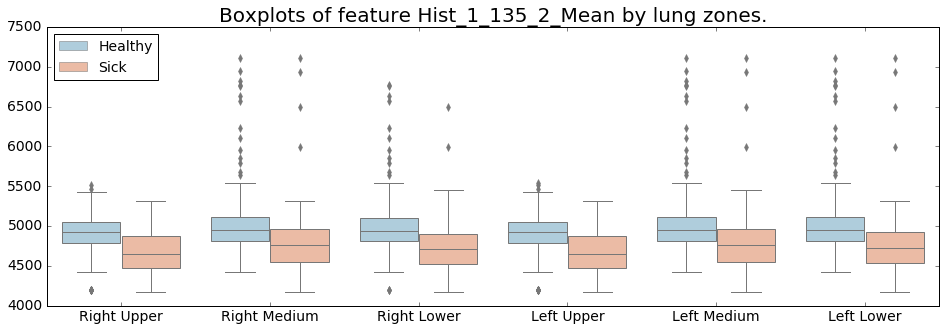

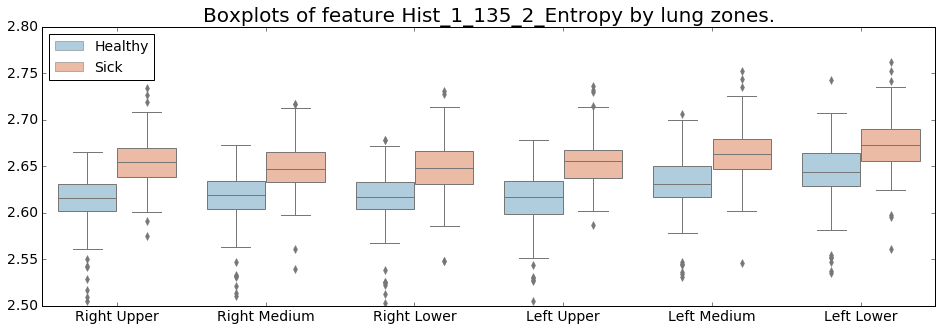

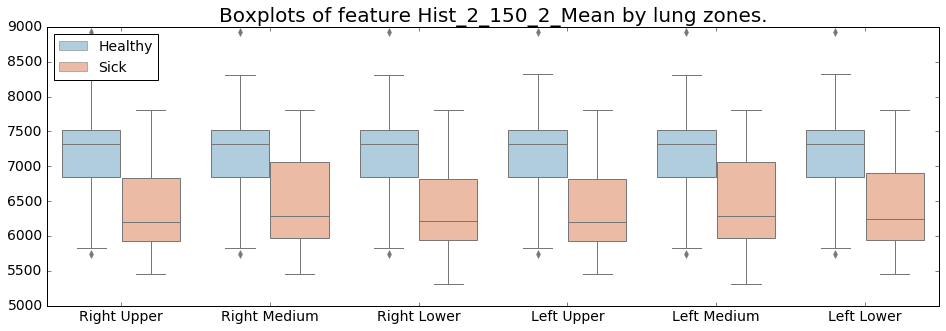

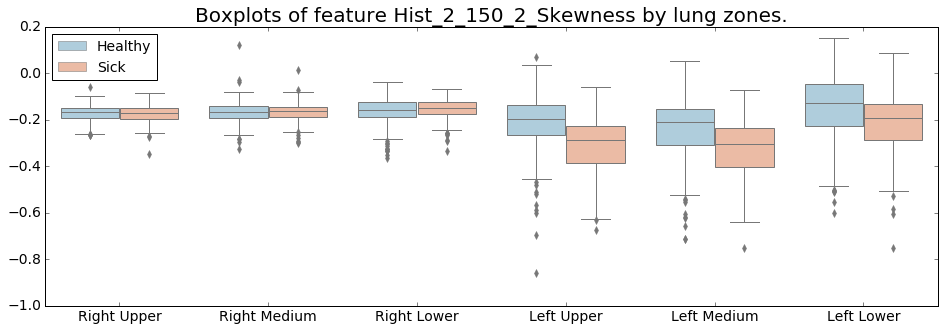

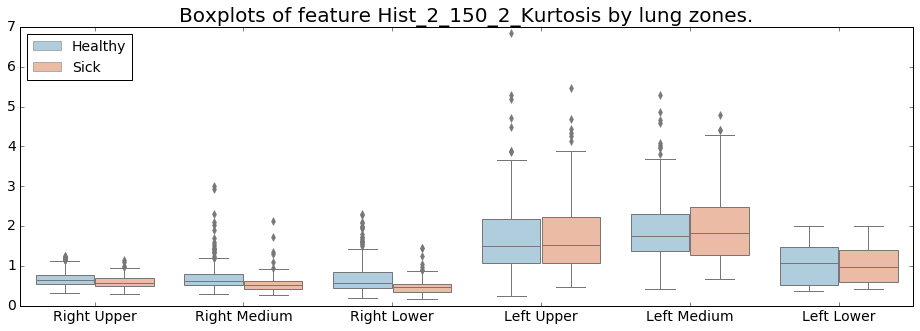

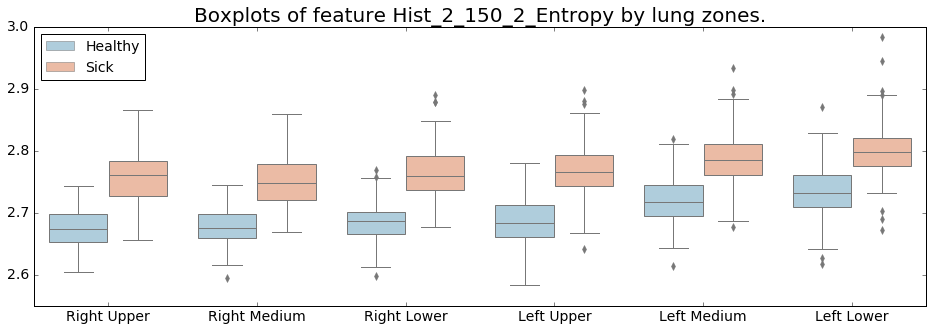

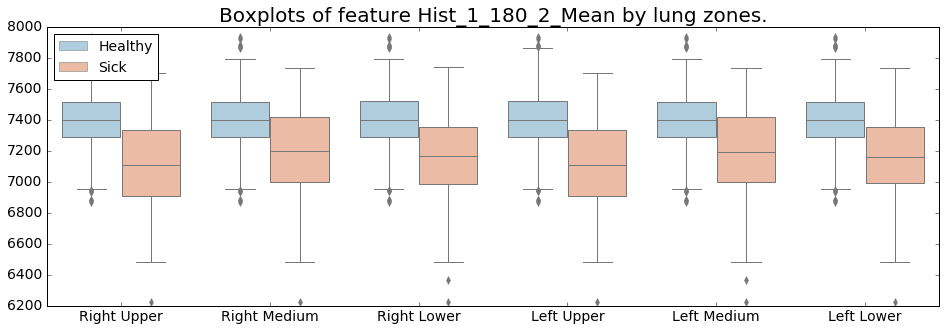

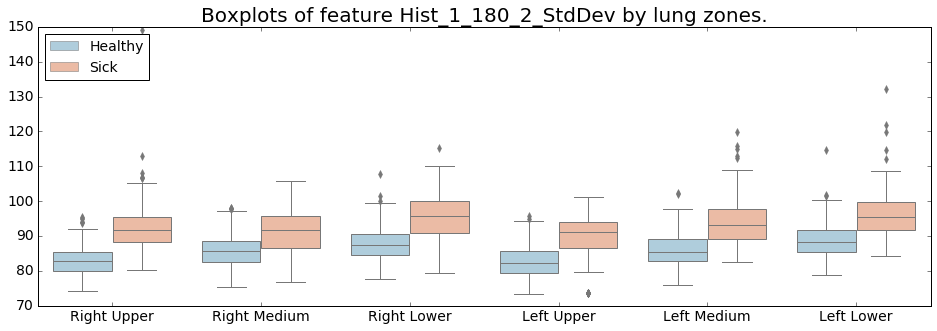

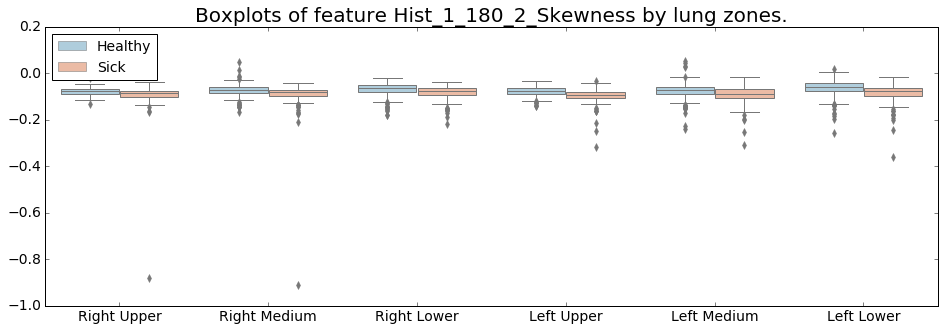

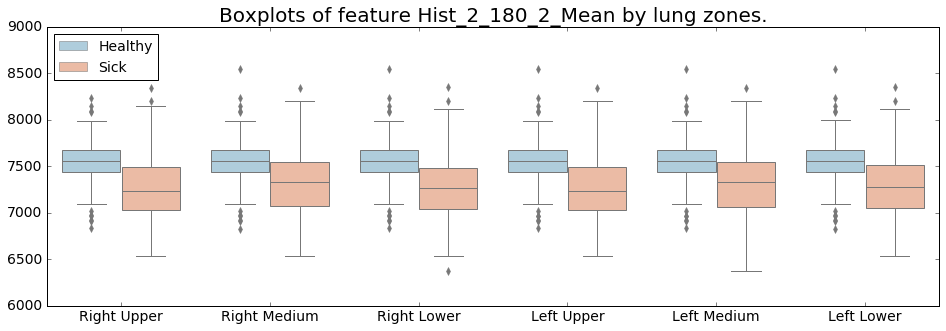

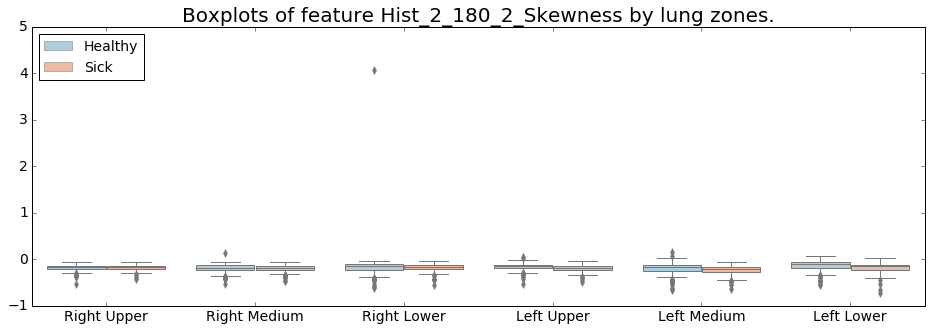

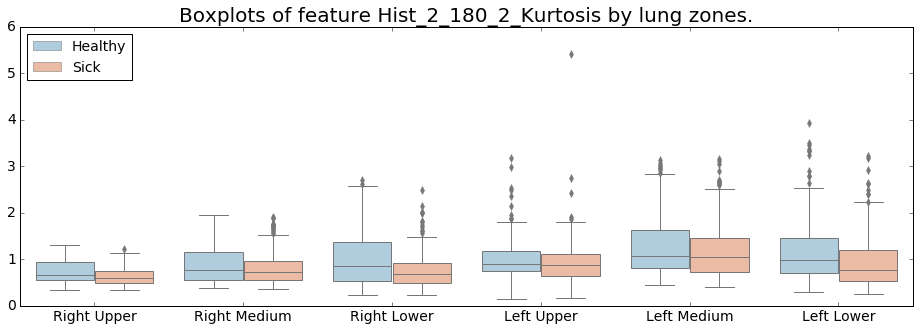

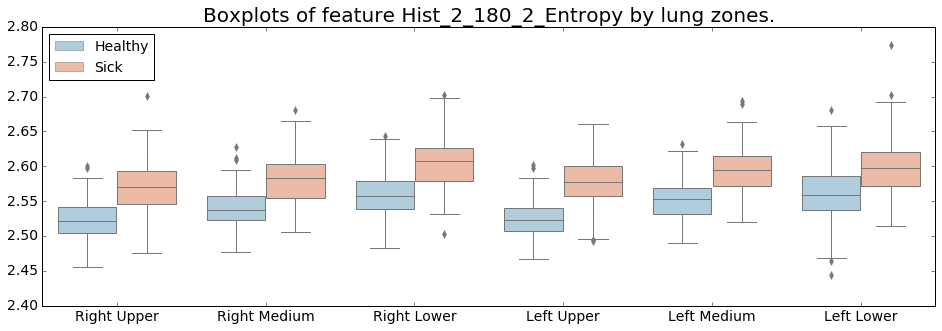

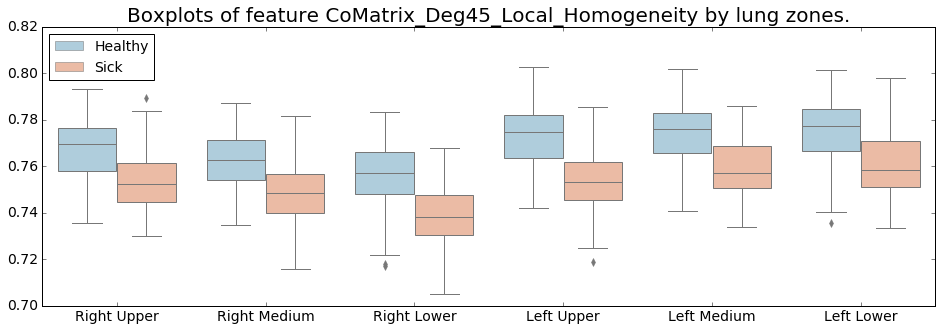

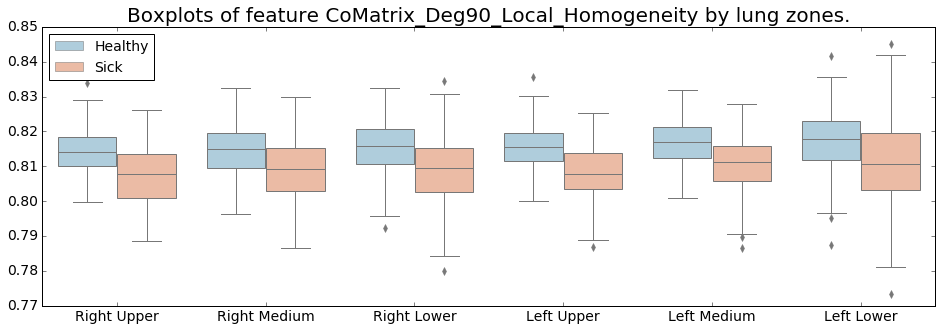

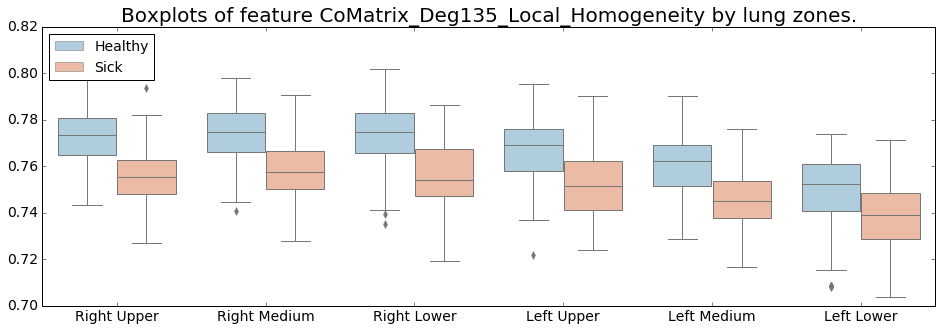

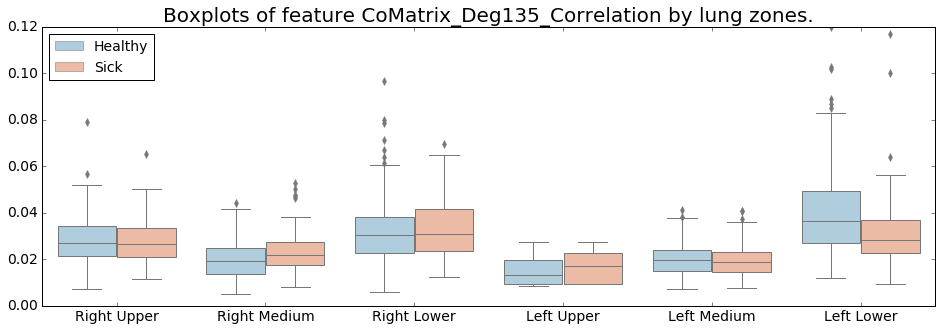

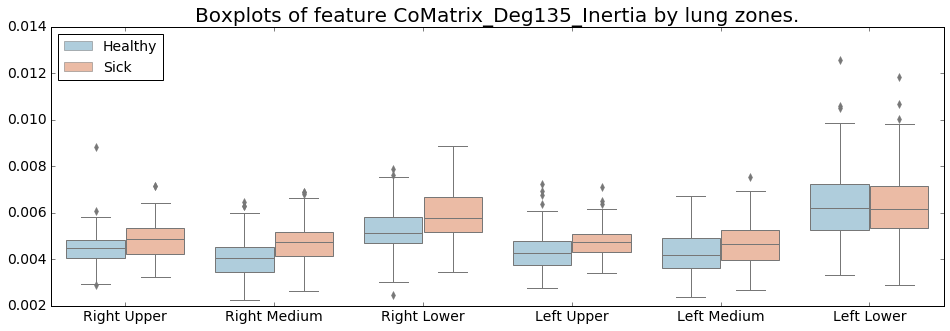

In [36]:
import seaborn as sns

df_RU['Zone'] = 'Right Upper'
df_RM['Zone'] = 'Right Medium'
df_RL['Zone'] = 'Right Lower'
df_LU['Zone'] = 'Left Upper'
df_LM['Zone'] = 'Left Medium'
df_LL['Zone'] = 'Left Lower'


columns_to_exclude = ['PatientNumMasked', 'Label', 'Zone']
for col in df_RU.columns:
    if col in columns_to_exclude:
        pass
    else:
        df = pd.concat([df_RU[[col, 'Zone', 'Label']], 
                        df_RM[[col, 'Zone', 'Label']], 
                        df_RL[[col, 'Zone', 'Label']],
                        df_LU[[col, 'Zone', 'Label']], 
                        df_LM[[col, 'Zone', 'Label']], 
                        df_LL[[col, 'Zone', 'Label']]], axis=0)

        fig = plt.figure(figsize=(16, 5))
        ax = plt.axes()
        plt.hold(True)

        bp = sns.boxplot(x='Zone', y=col, hue='Label', data=df, palette='RdBu_r')
        plt.title('Boxplots of feature '+col+' by lung zones.', fontsize=20)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.axes().get_yaxis().get_label().set_visible(False)
        plt.axes().get_xaxis().get_label().set_visible(False)
        L=plt.legend(fontsize=14, loc=2)
        L.get_texts()[0].set_text('Healthy')
        L.get_texts()[1].set_text('Sick')
        plt.show()
        plt.close()
        

Univariate analysis revealed many outliers in the dataset. Worth to mention is that extreem outliers occurs only in 'Healthy' class. Some of features contains very sevire outliers (ex. Hist_2_180_2_Kurtosis Right Lower zone). These outliers will need to be handeled in later part. During the analysis differences between class labels are visible for some features (ex. Hist_2_135_1_Entropy).

### 2.3 Multivariate analysis

Multivariate is second step, it is used to see relationship between features. Because dataset contains only continuous features, during the analysis we will only compare these type of features with breakdown into class labels to get additional information.

Comparing every feature will result in 39x39 grid which is too much.

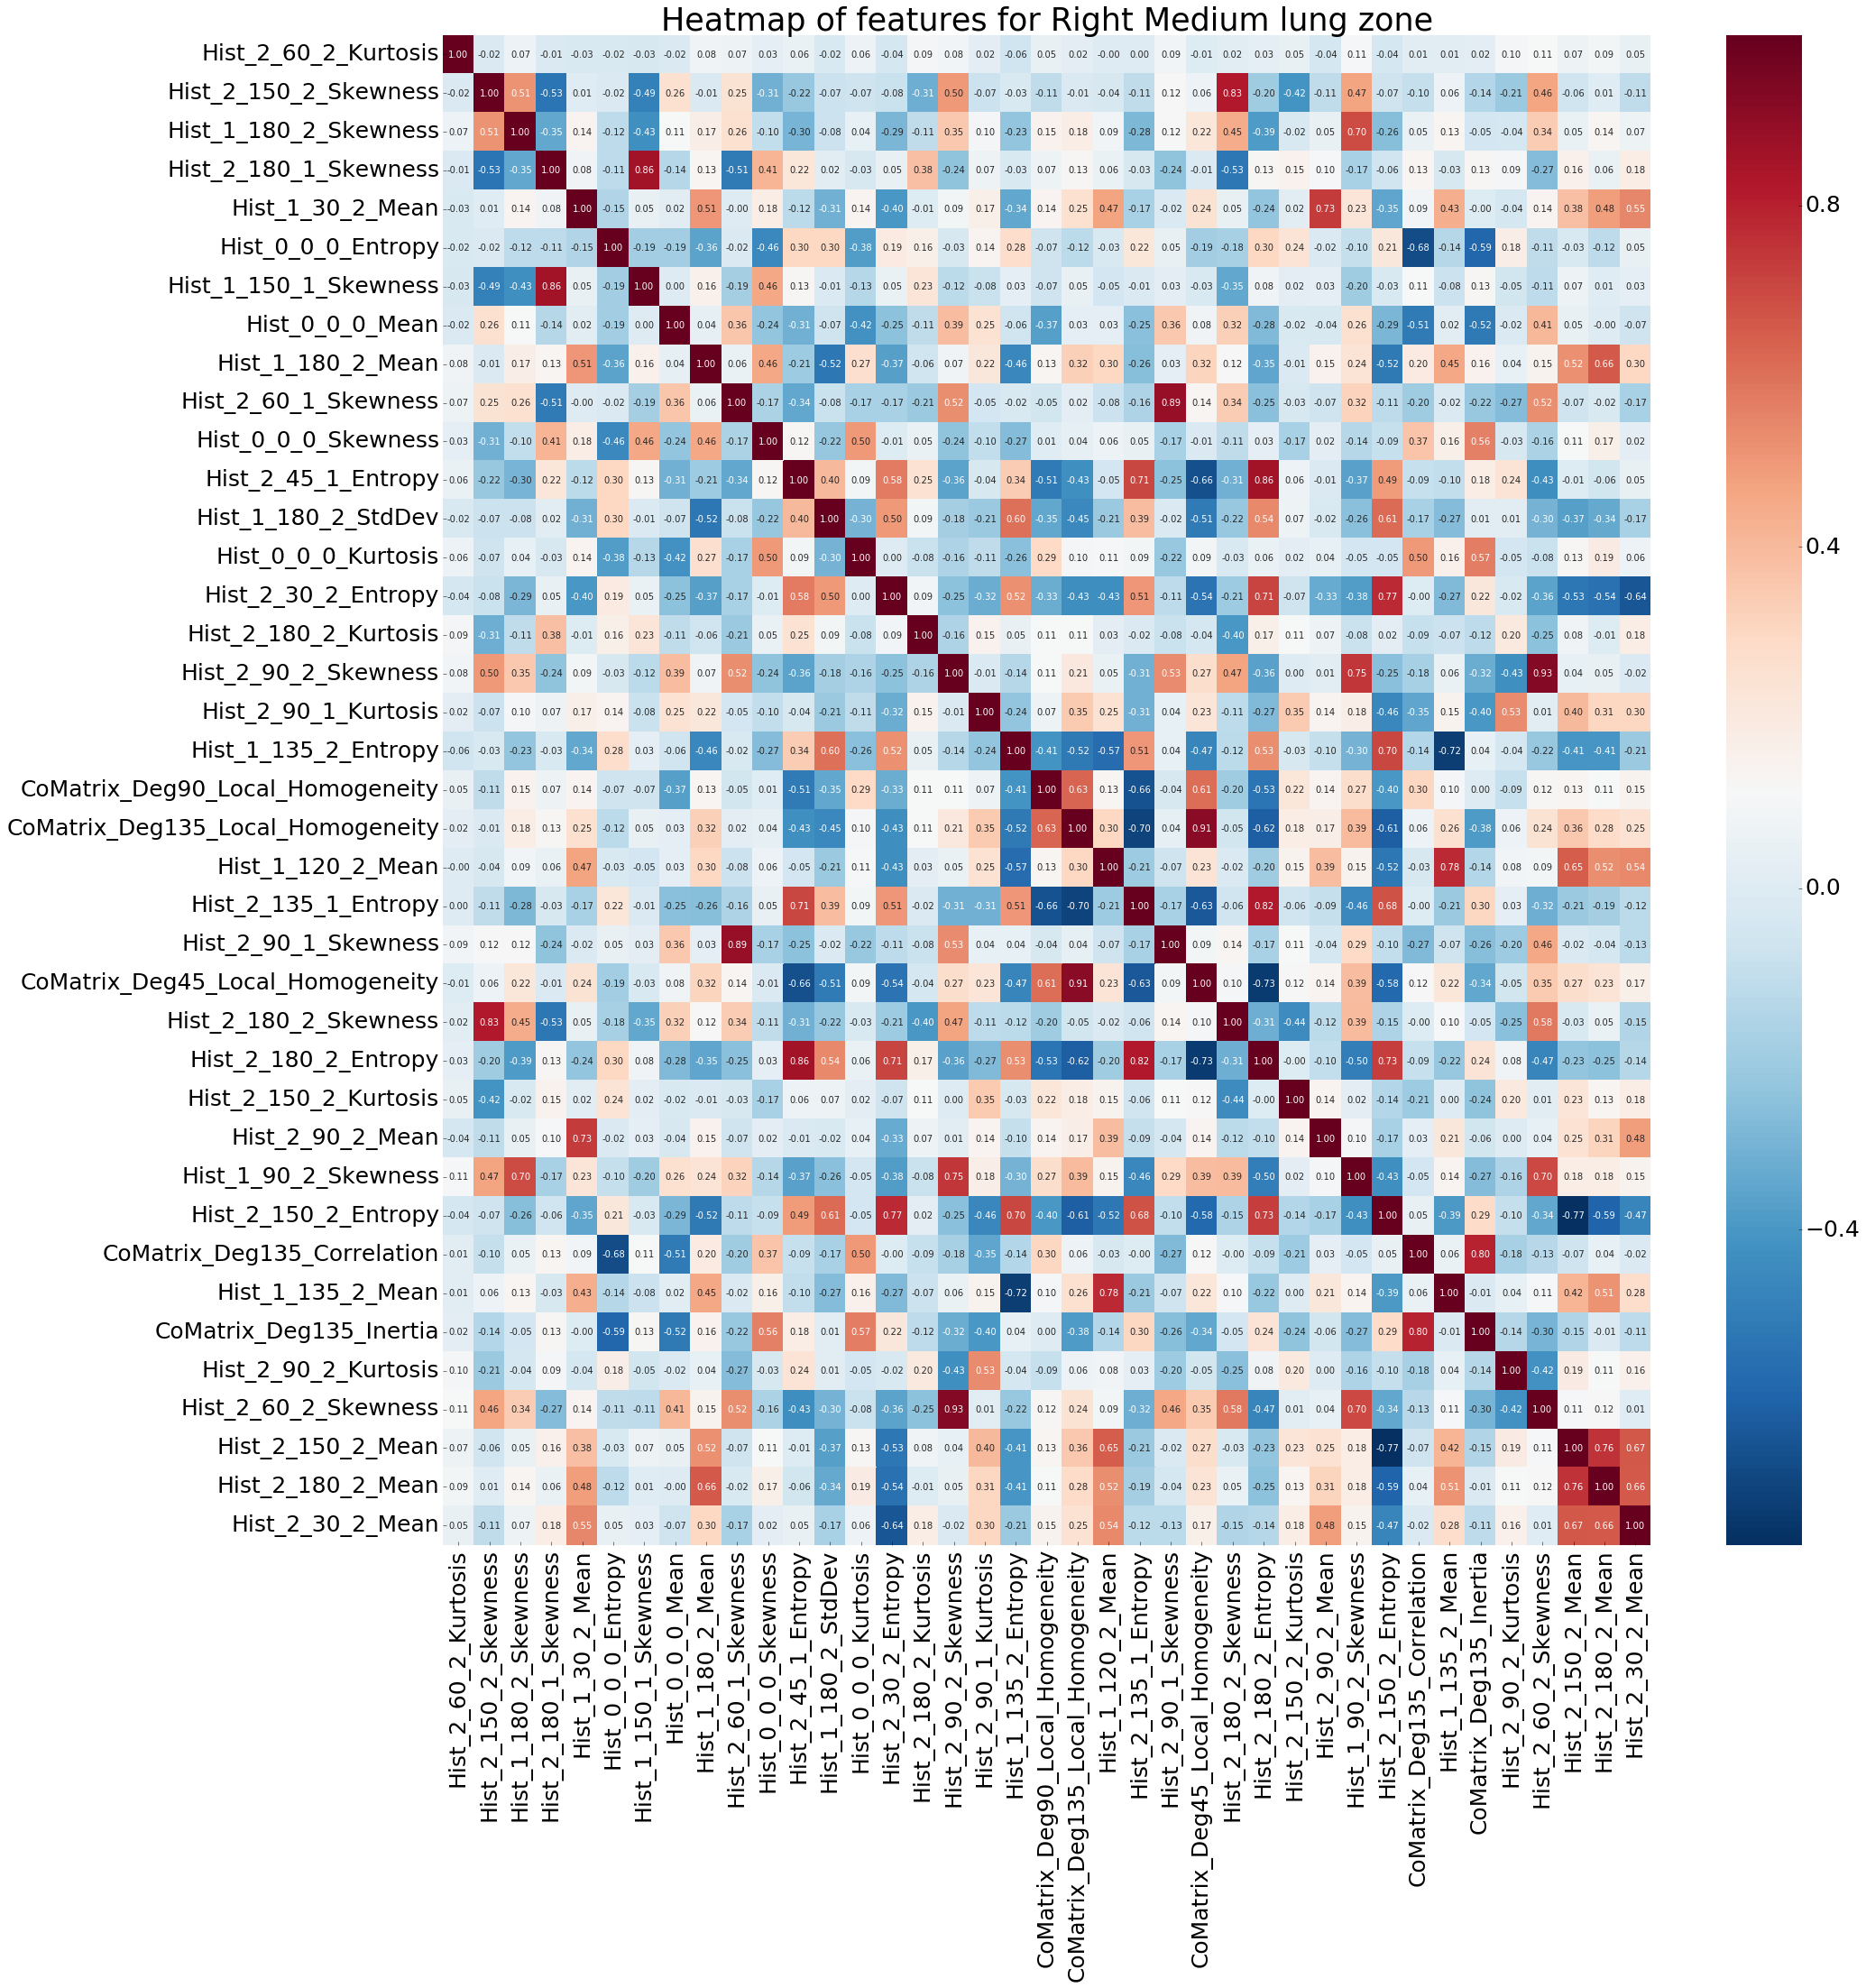

Table of features Pearson correlation coefficients (corr > 0.7) for  Right Medium  lung zone

                                                                    Correlation
Hist_2_60_2_Skewness             Hist_2_90_2_Skewness                  0.926856
CoMatrix_Deg45_Local_Homogeneity CoMatrix_Deg135_Local_Homogeneity     0.911364
Hist_2_90_1_Skewness             Hist_2_60_1_Skewness                  0.887119
Hist_2_180_2_Entropy             Hist_2_45_1_Entropy                   0.860113
Hist_1_150_1_Skewness            Hist_2_180_1_Skewness                 0.858382
Hist_2_180_2_Skewness            Hist_2_150_2_Skewness                 0.825750
Hist_2_180_2_Entropy             Hist_2_135_1_Entropy                  0.822146
CoMatrix_Deg135_Inertia          CoMatrix_Deg135_Correlation           0.797374
Hist_1_135_2_Mean                Hist_1_120_2_Mean                     0.777939
Hist_2_150_2_Entropy             Hist_2_30_2_Entropy                   0.774896
Hist_2_150_2_Mean         

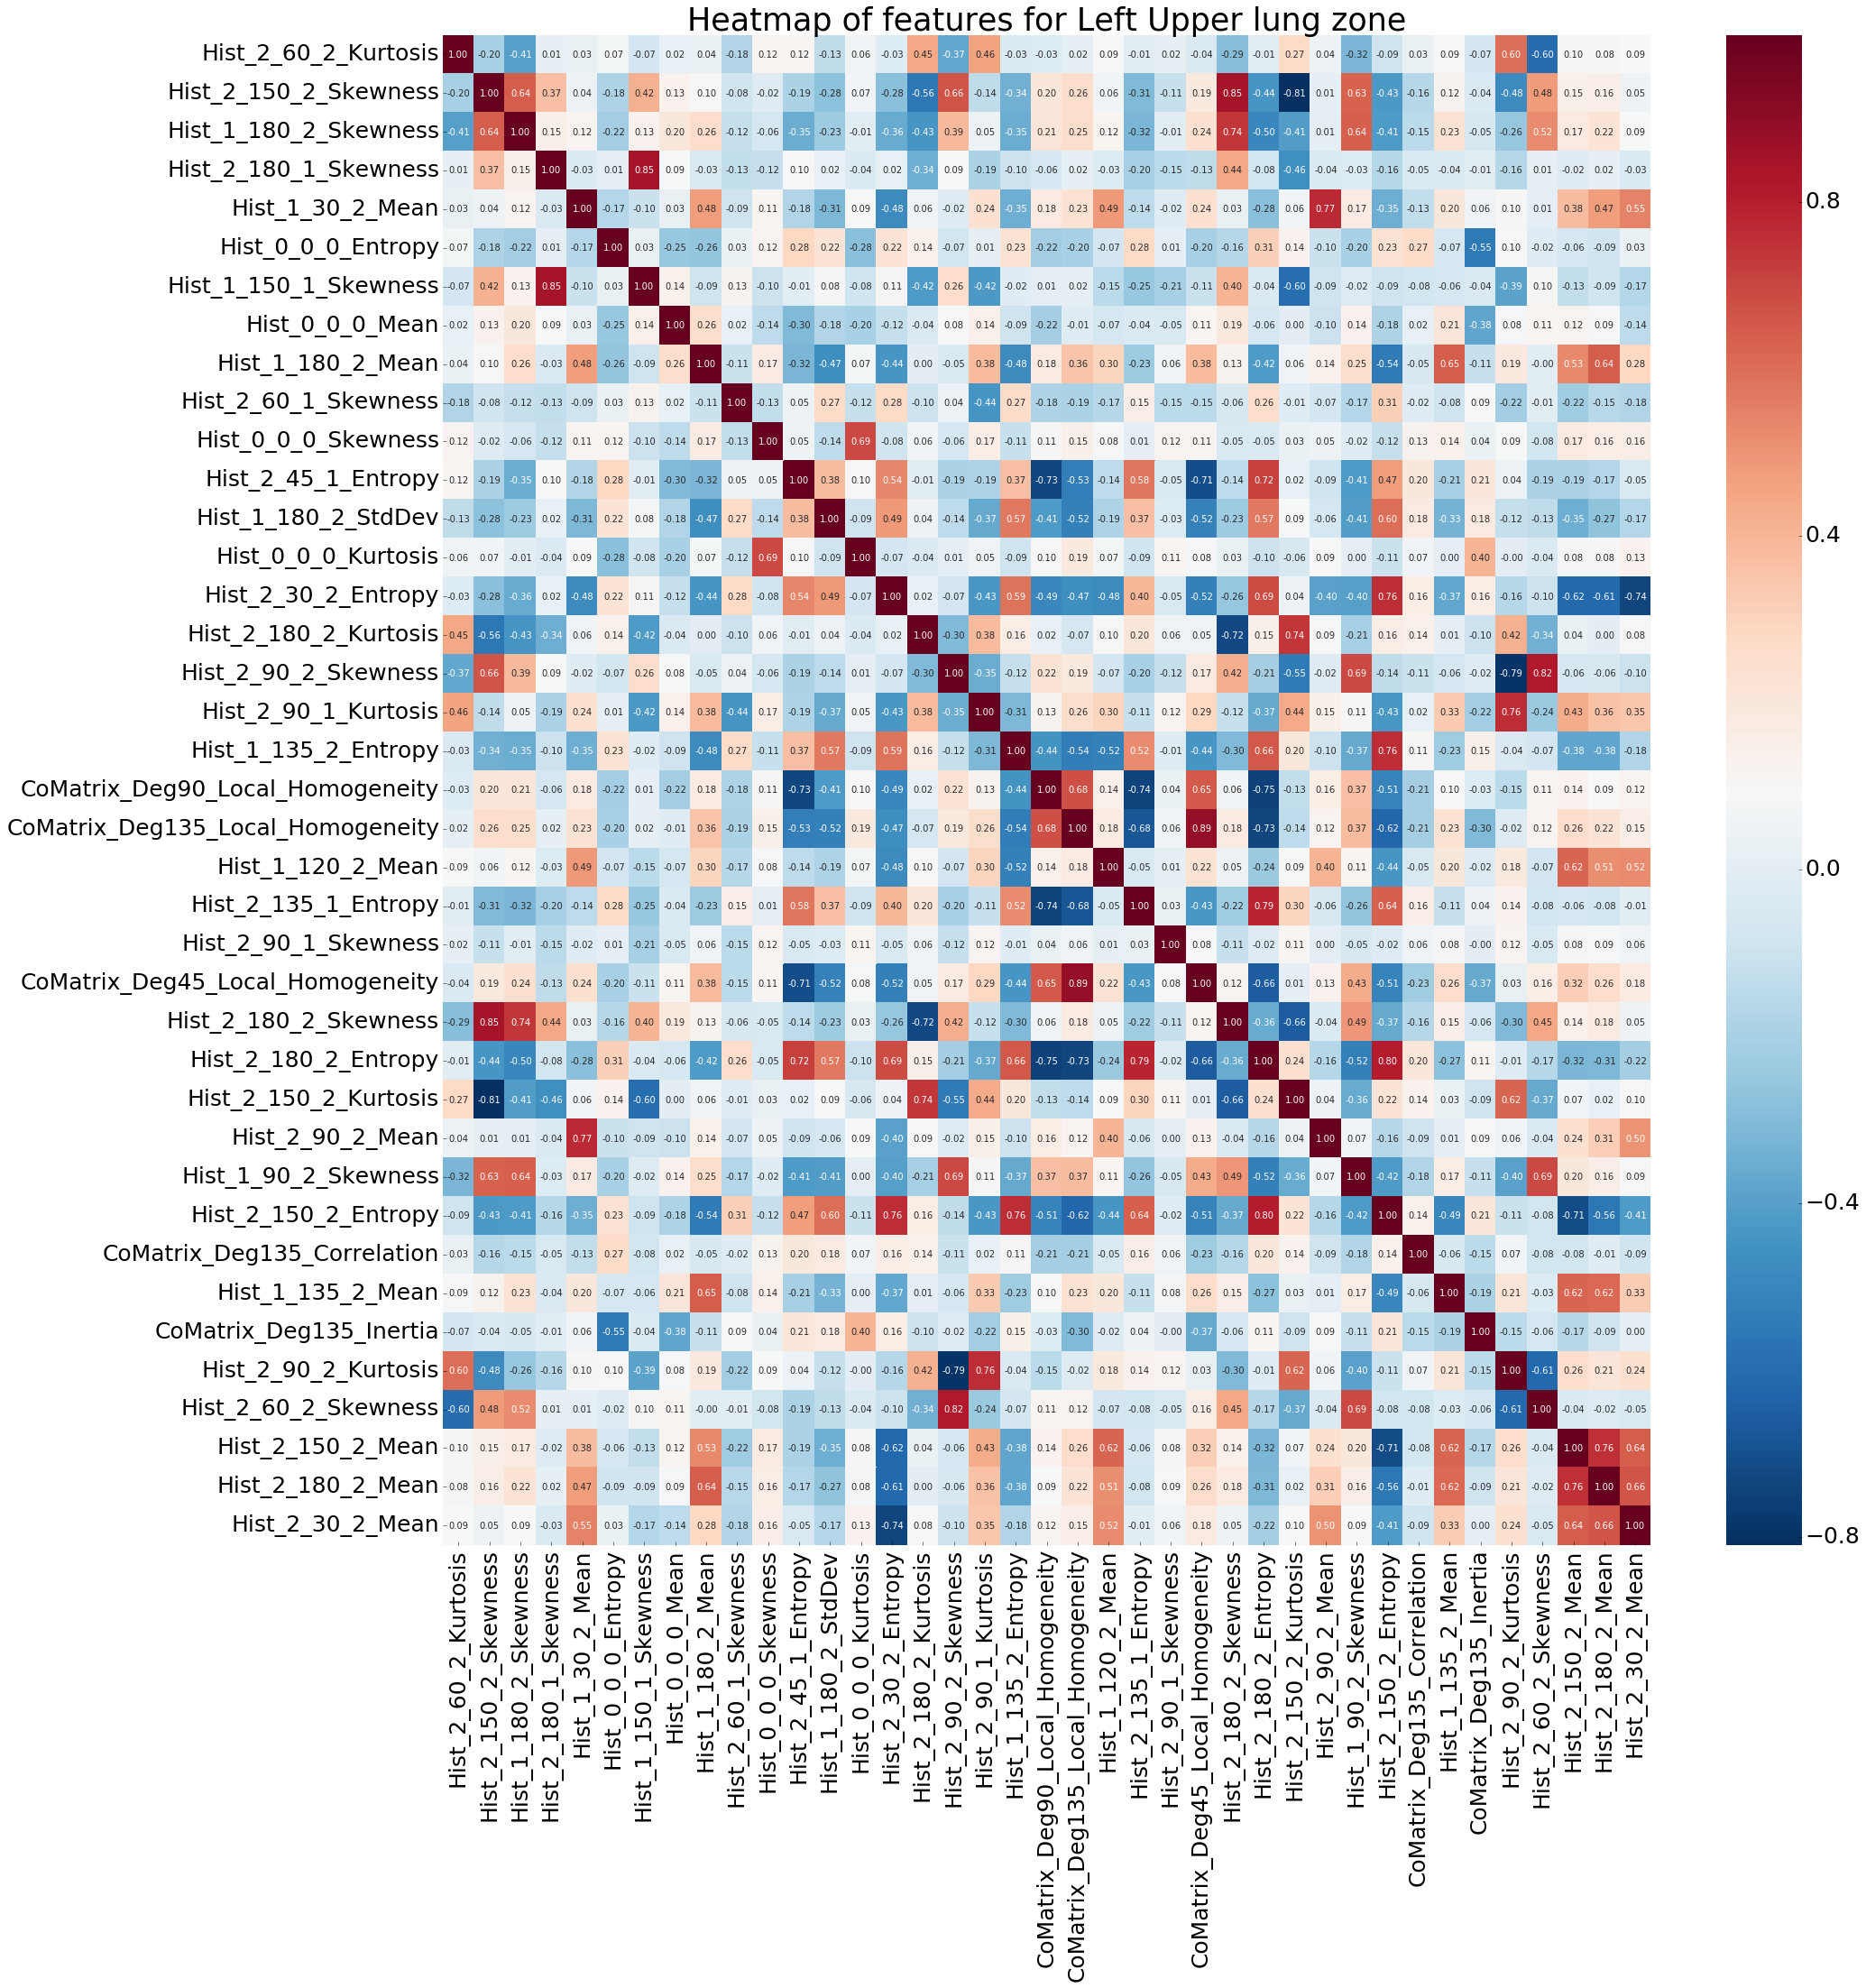

Table of features Pearson correlation coefficients (corr > 0.7) for  Left Upper  lung zone

                                                                    Correlation
CoMatrix_Deg45_Local_Homogeneity CoMatrix_Deg135_Local_Homogeneity     0.886945
Hist_1_150_1_Skewness            Hist_2_180_1_Skewness                 0.846237
Hist_2_180_2_Skewness            Hist_2_150_2_Skewness                 0.845724
Hist_2_60_2_Skewness             Hist_2_90_2_Skewness                  0.818869
Hist_2_150_2_Kurtosis            Hist_2_150_2_Skewness                 0.809481
Hist_2_150_2_Entropy             Hist_2_180_2_Entropy                  0.803040
Hist_2_90_2_Kurtosis             Hist_2_90_2_Skewness                  0.788405
Hist_2_180_2_Entropy             Hist_2_135_1_Entropy                  0.786177
Hist_2_90_2_Mean                 Hist_1_30_2_Mean                      0.767320
Hist_2_150_2_Entropy             Hist_2_30_2_Entropy                   0.764940
                            

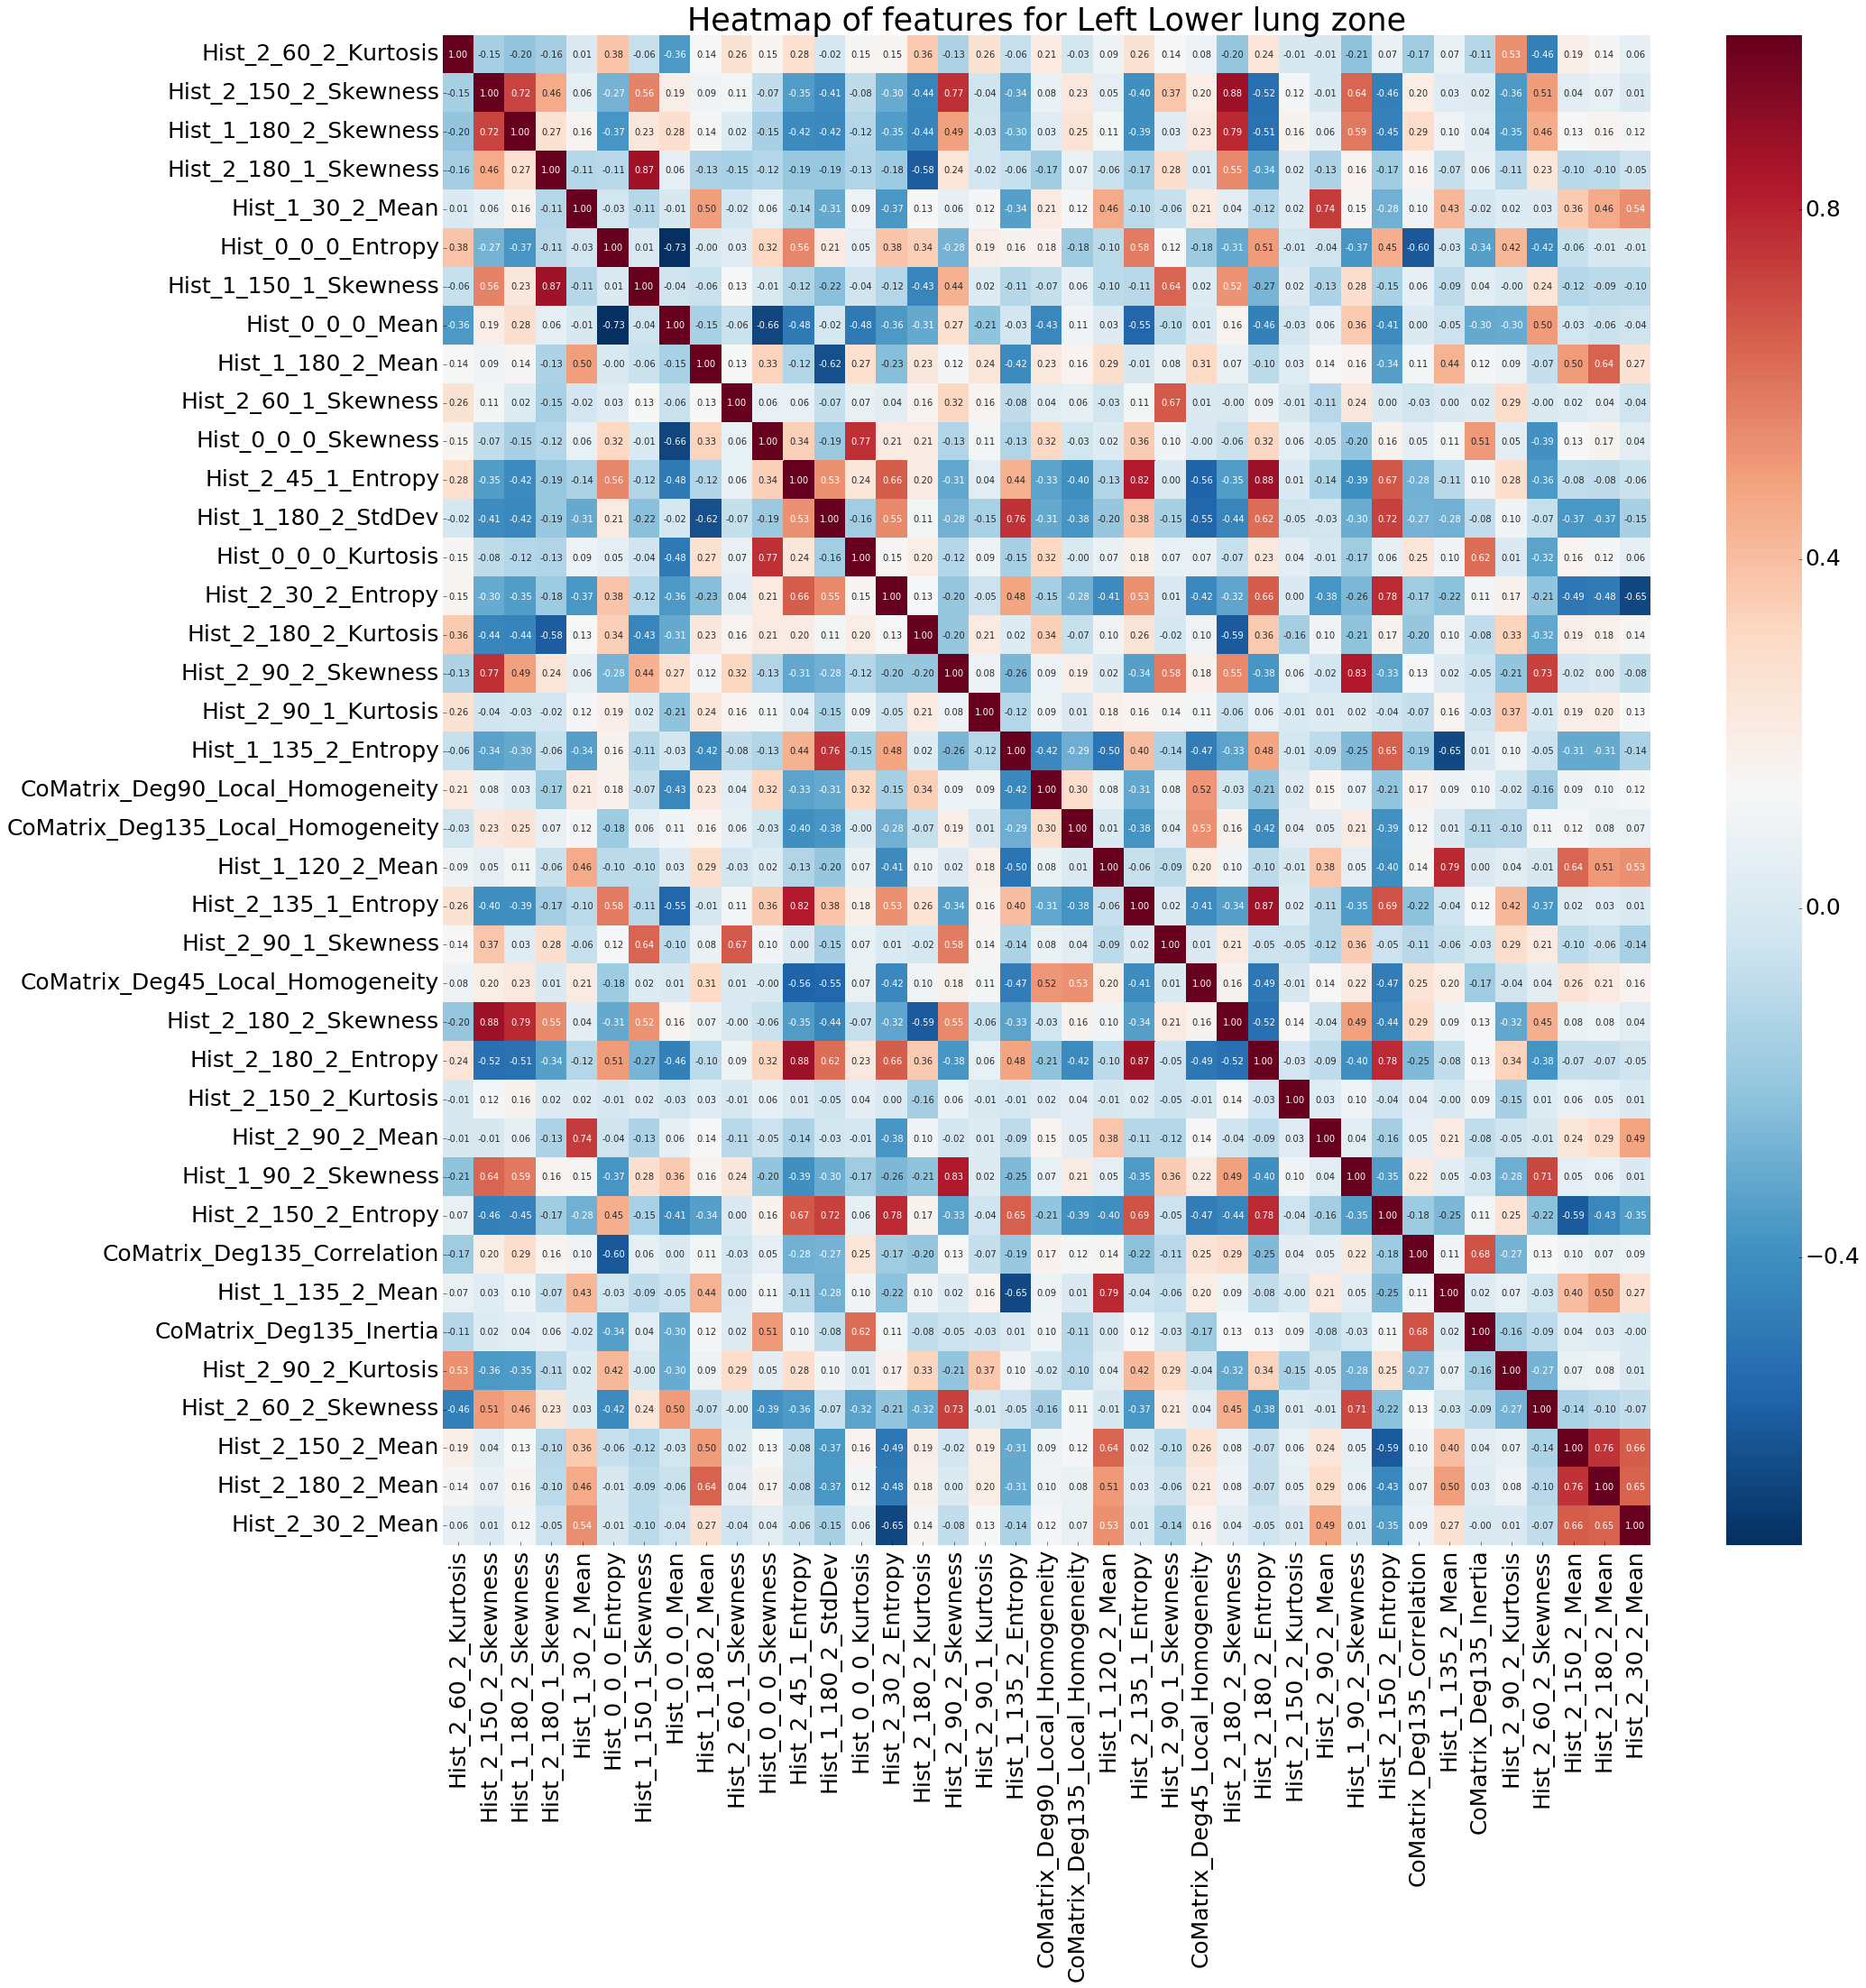

Table of features Pearson correlation coefficients (corr > 0.7) for  Left Lower  lung zone

                                             Correlation
Hist_2_180_2_Entropy  Hist_2_45_1_Entropy       0.877223
Hist_2_180_2_Skewness Hist_2_150_2_Skewness     0.876137
Hist_1_150_1_Skewness Hist_2_180_1_Skewness     0.867185
Hist_2_180_2_Entropy  Hist_2_135_1_Entropy      0.867147
Hist_1_90_2_Skewness  Hist_2_90_2_Skewness      0.828498
Hist_2_135_1_Entropy  Hist_2_45_1_Entropy       0.818400
Hist_2_180_2_Skewness Hist_1_180_2_Skewness     0.789497
Hist_1_135_2_Mean     Hist_1_120_2_Mean         0.786545
Hist_2_150_2_Entropy  Hist_2_180_2_Entropy      0.778886
                      Hist_2_30_2_Entropy       0.777909
Hist_0_0_0_Kurtosis   Hist_0_0_0_Skewness       0.768259
Hist_2_90_2_Skewness  Hist_2_150_2_Skewness     0.767451
Hist_1_135_2_Entropy  Hist_1_180_2_StdDev       0.762262
Hist_2_180_2_Mean     Hist_2_150_2_Mean         0.761997
Hist_2_90_2_Mean      Hist_1_30_2_Mean          0.741

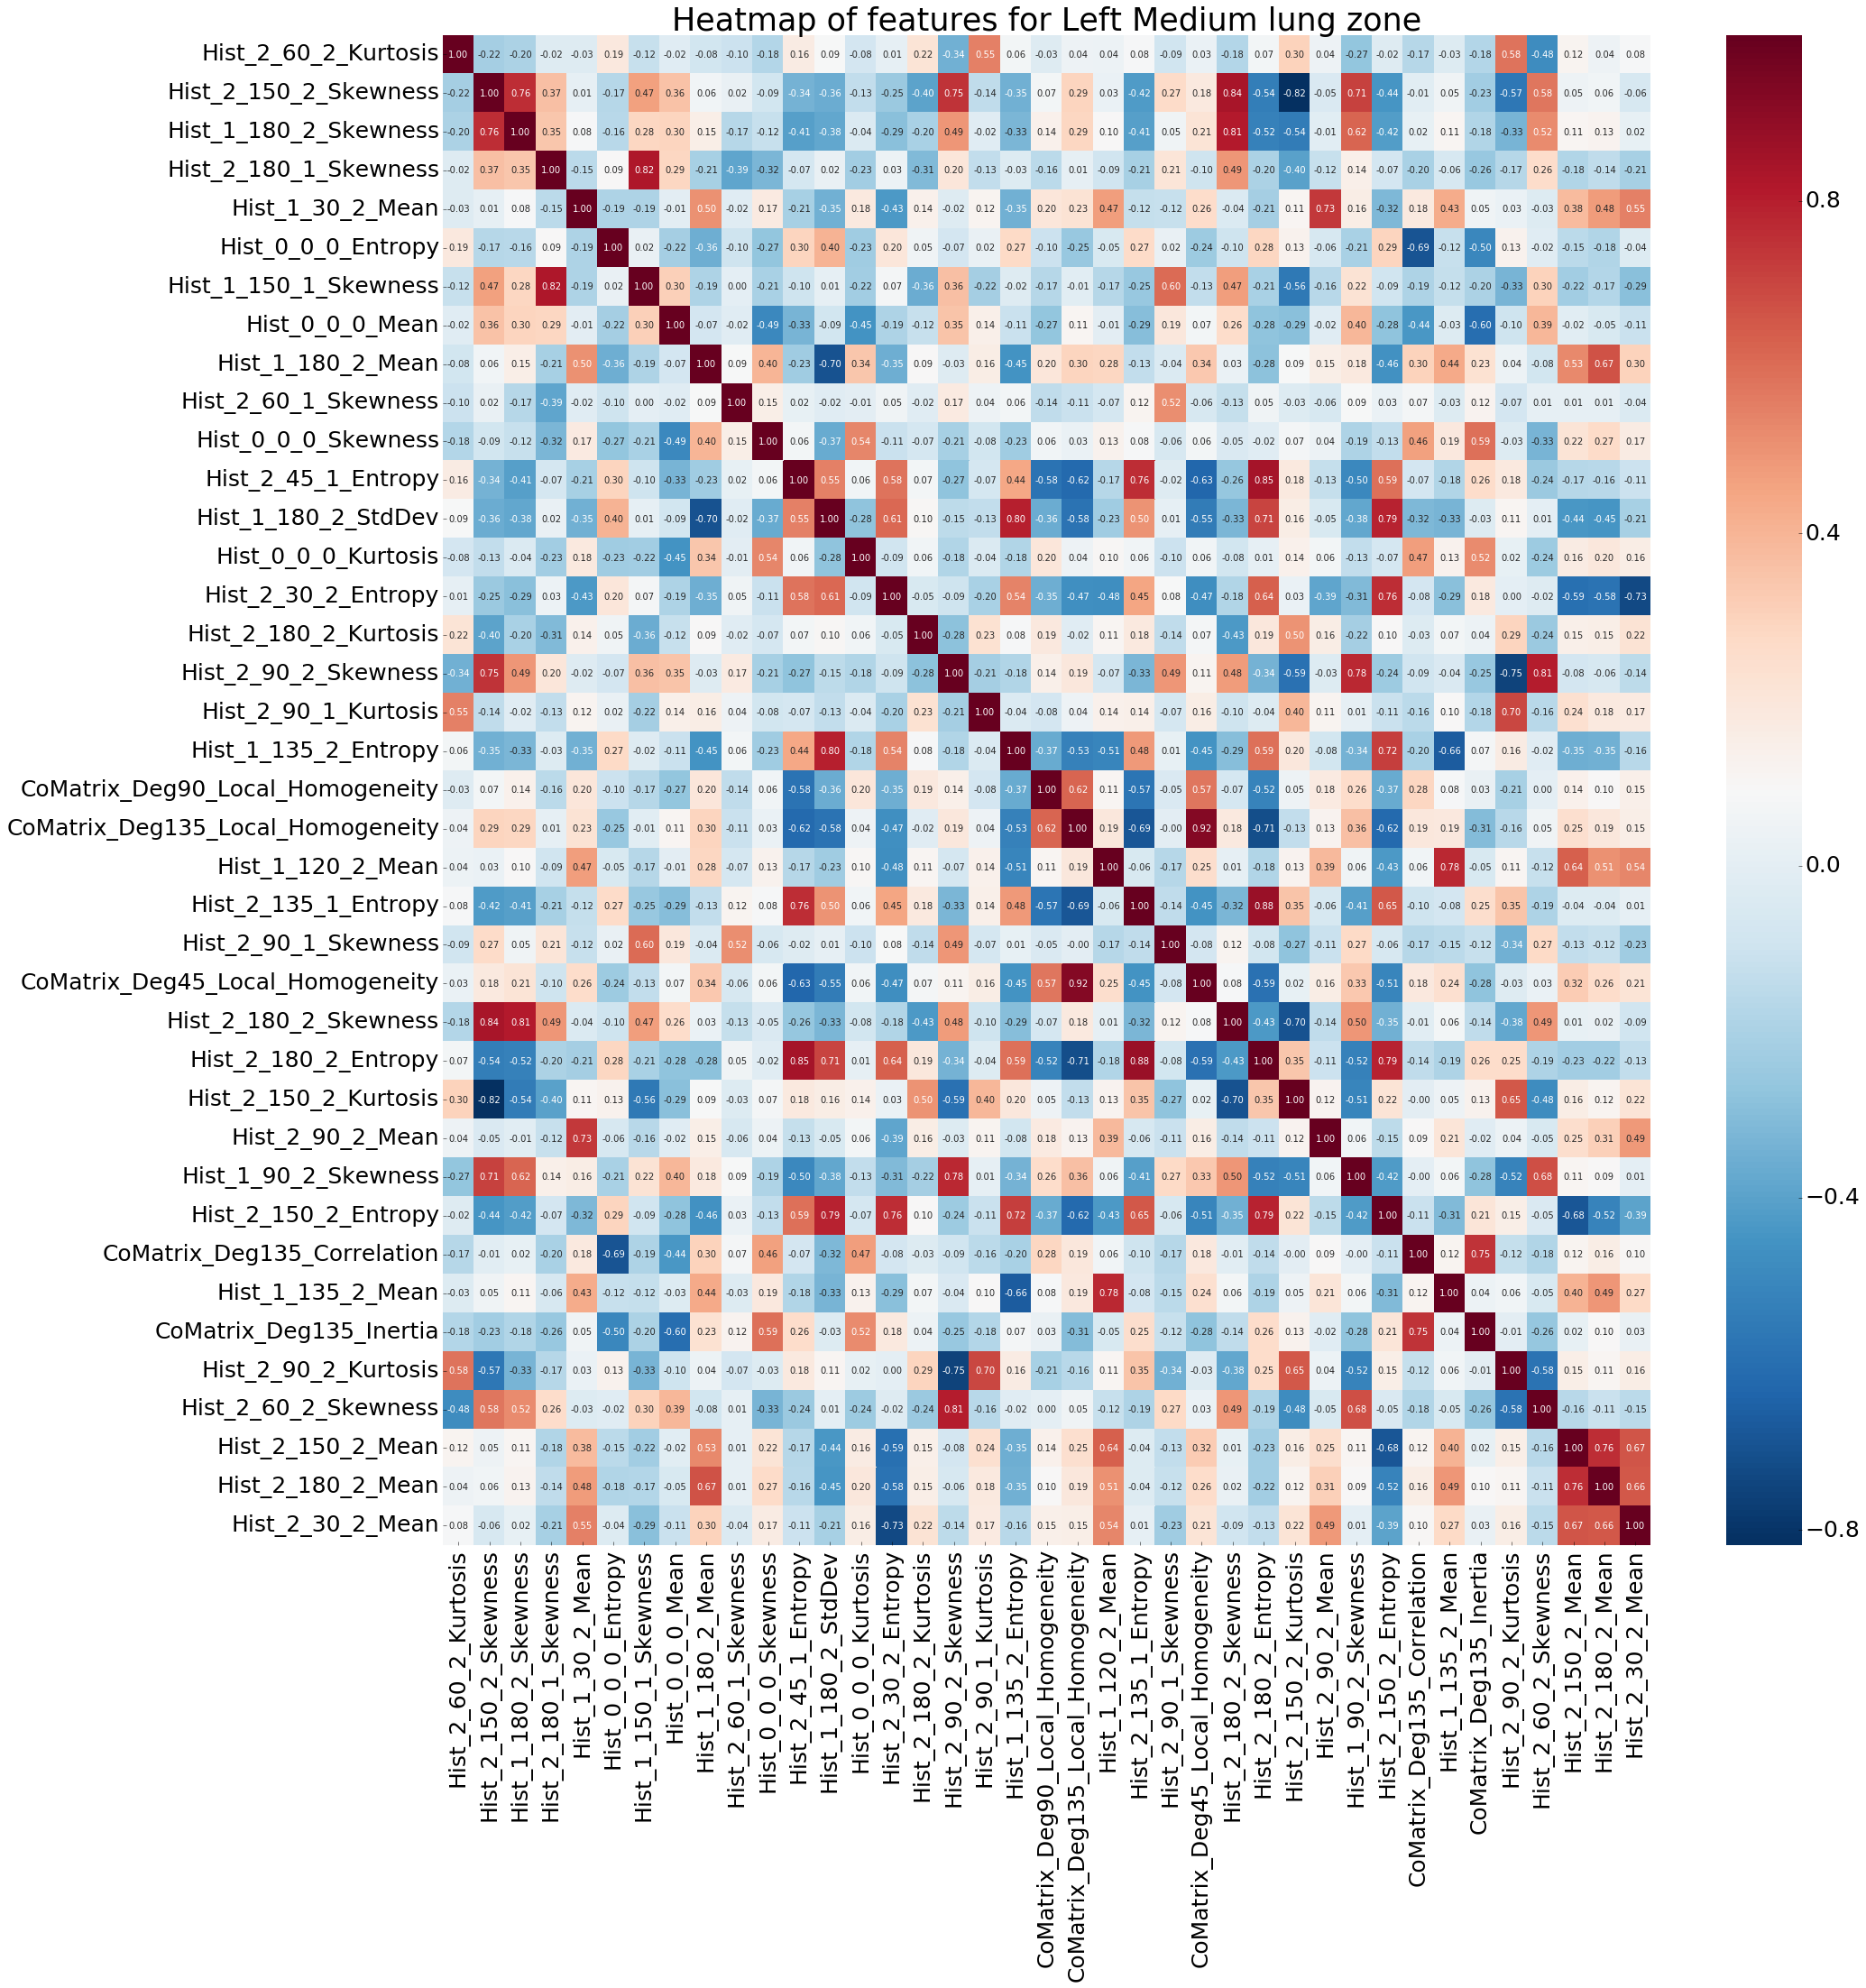

Table of features Pearson correlation coefficients (corr > 0.7) for  Left Medium  lung zone

                                                                    Correlation
CoMatrix_Deg45_Local_Homogeneity CoMatrix_Deg135_Local_Homogeneity     0.922577
Hist_2_180_2_Entropy             Hist_2_135_1_Entropy                  0.876108
                                 Hist_2_45_1_Entropy                   0.845282
Hist_2_180_2_Skewness            Hist_2_150_2_Skewness                 0.838062
Hist_1_150_1_Skewness            Hist_2_180_1_Skewness                 0.824627
Hist_2_150_2_Kurtosis            Hist_2_150_2_Skewness                 0.817735
Hist_2_180_2_Skewness            Hist_1_180_2_Skewness                 0.812359
Hist_2_60_2_Skewness             Hist_2_90_2_Skewness                  0.807880
Hist_1_135_2_Entropy             Hist_1_180_2_StdDev                   0.797114
Hist_2_150_2_Entropy             Hist_1_180_2_StdDev                   0.793015
                           

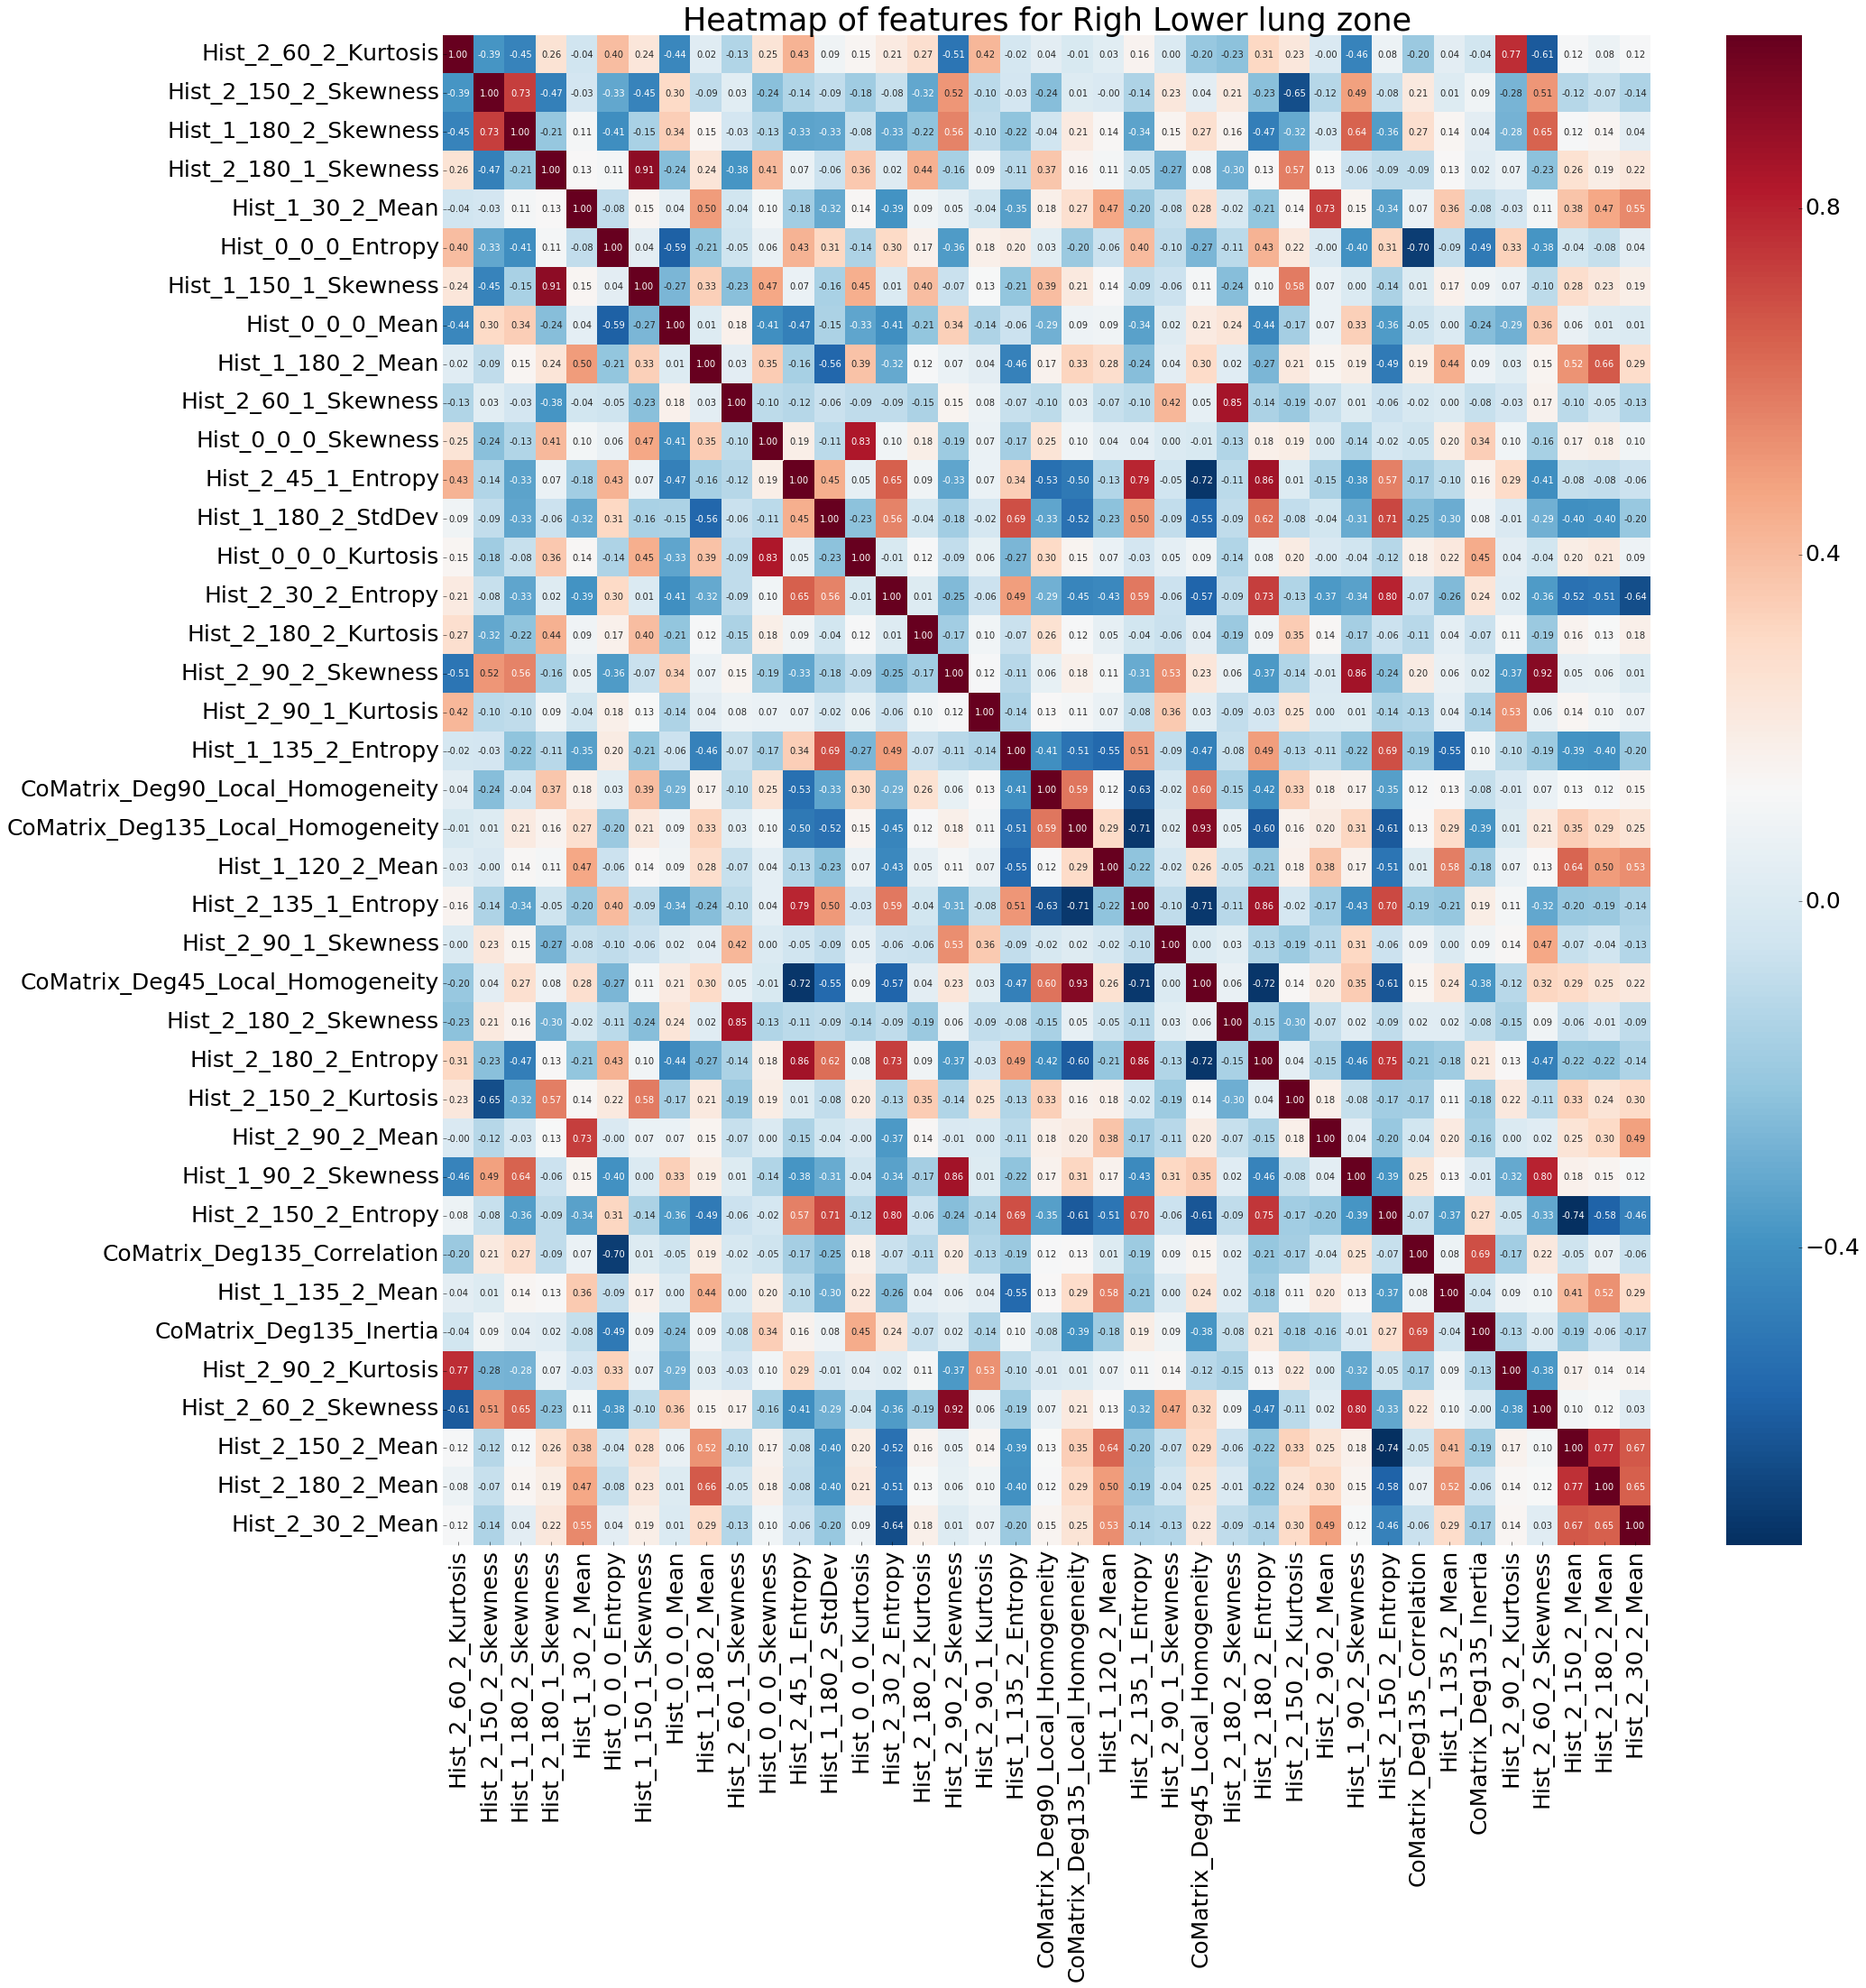

Table of features Pearson correlation coefficients (corr > 0.7) for  Righ Lower  lung zone

                                                                    Correlation
CoMatrix_Deg45_Local_Homogeneity CoMatrix_Deg135_Local_Homogeneity     0.928646
Hist_2_60_2_Skewness             Hist_2_90_2_Skewness                  0.924724
Hist_1_150_1_Skewness            Hist_2_180_1_Skewness                 0.907620
Hist_2_180_2_Entropy             Hist_2_45_1_Entropy                   0.861628
Hist_1_90_2_Skewness             Hist_2_90_2_Skewness                  0.859305
Hist_2_180_2_Entropy             Hist_2_135_1_Entropy                  0.857336
Hist_2_180_2_Skewness            Hist_2_60_1_Skewness                  0.851696
Hist_0_0_0_Kurtosis              Hist_0_0_0_Skewness                   0.832100
Hist_2_60_2_Skewness             Hist_1_90_2_Skewness                  0.798170
Hist_2_150_2_Entropy             Hist_2_30_2_Entropy                   0.797289
Hist_2_135_1_Entropy        

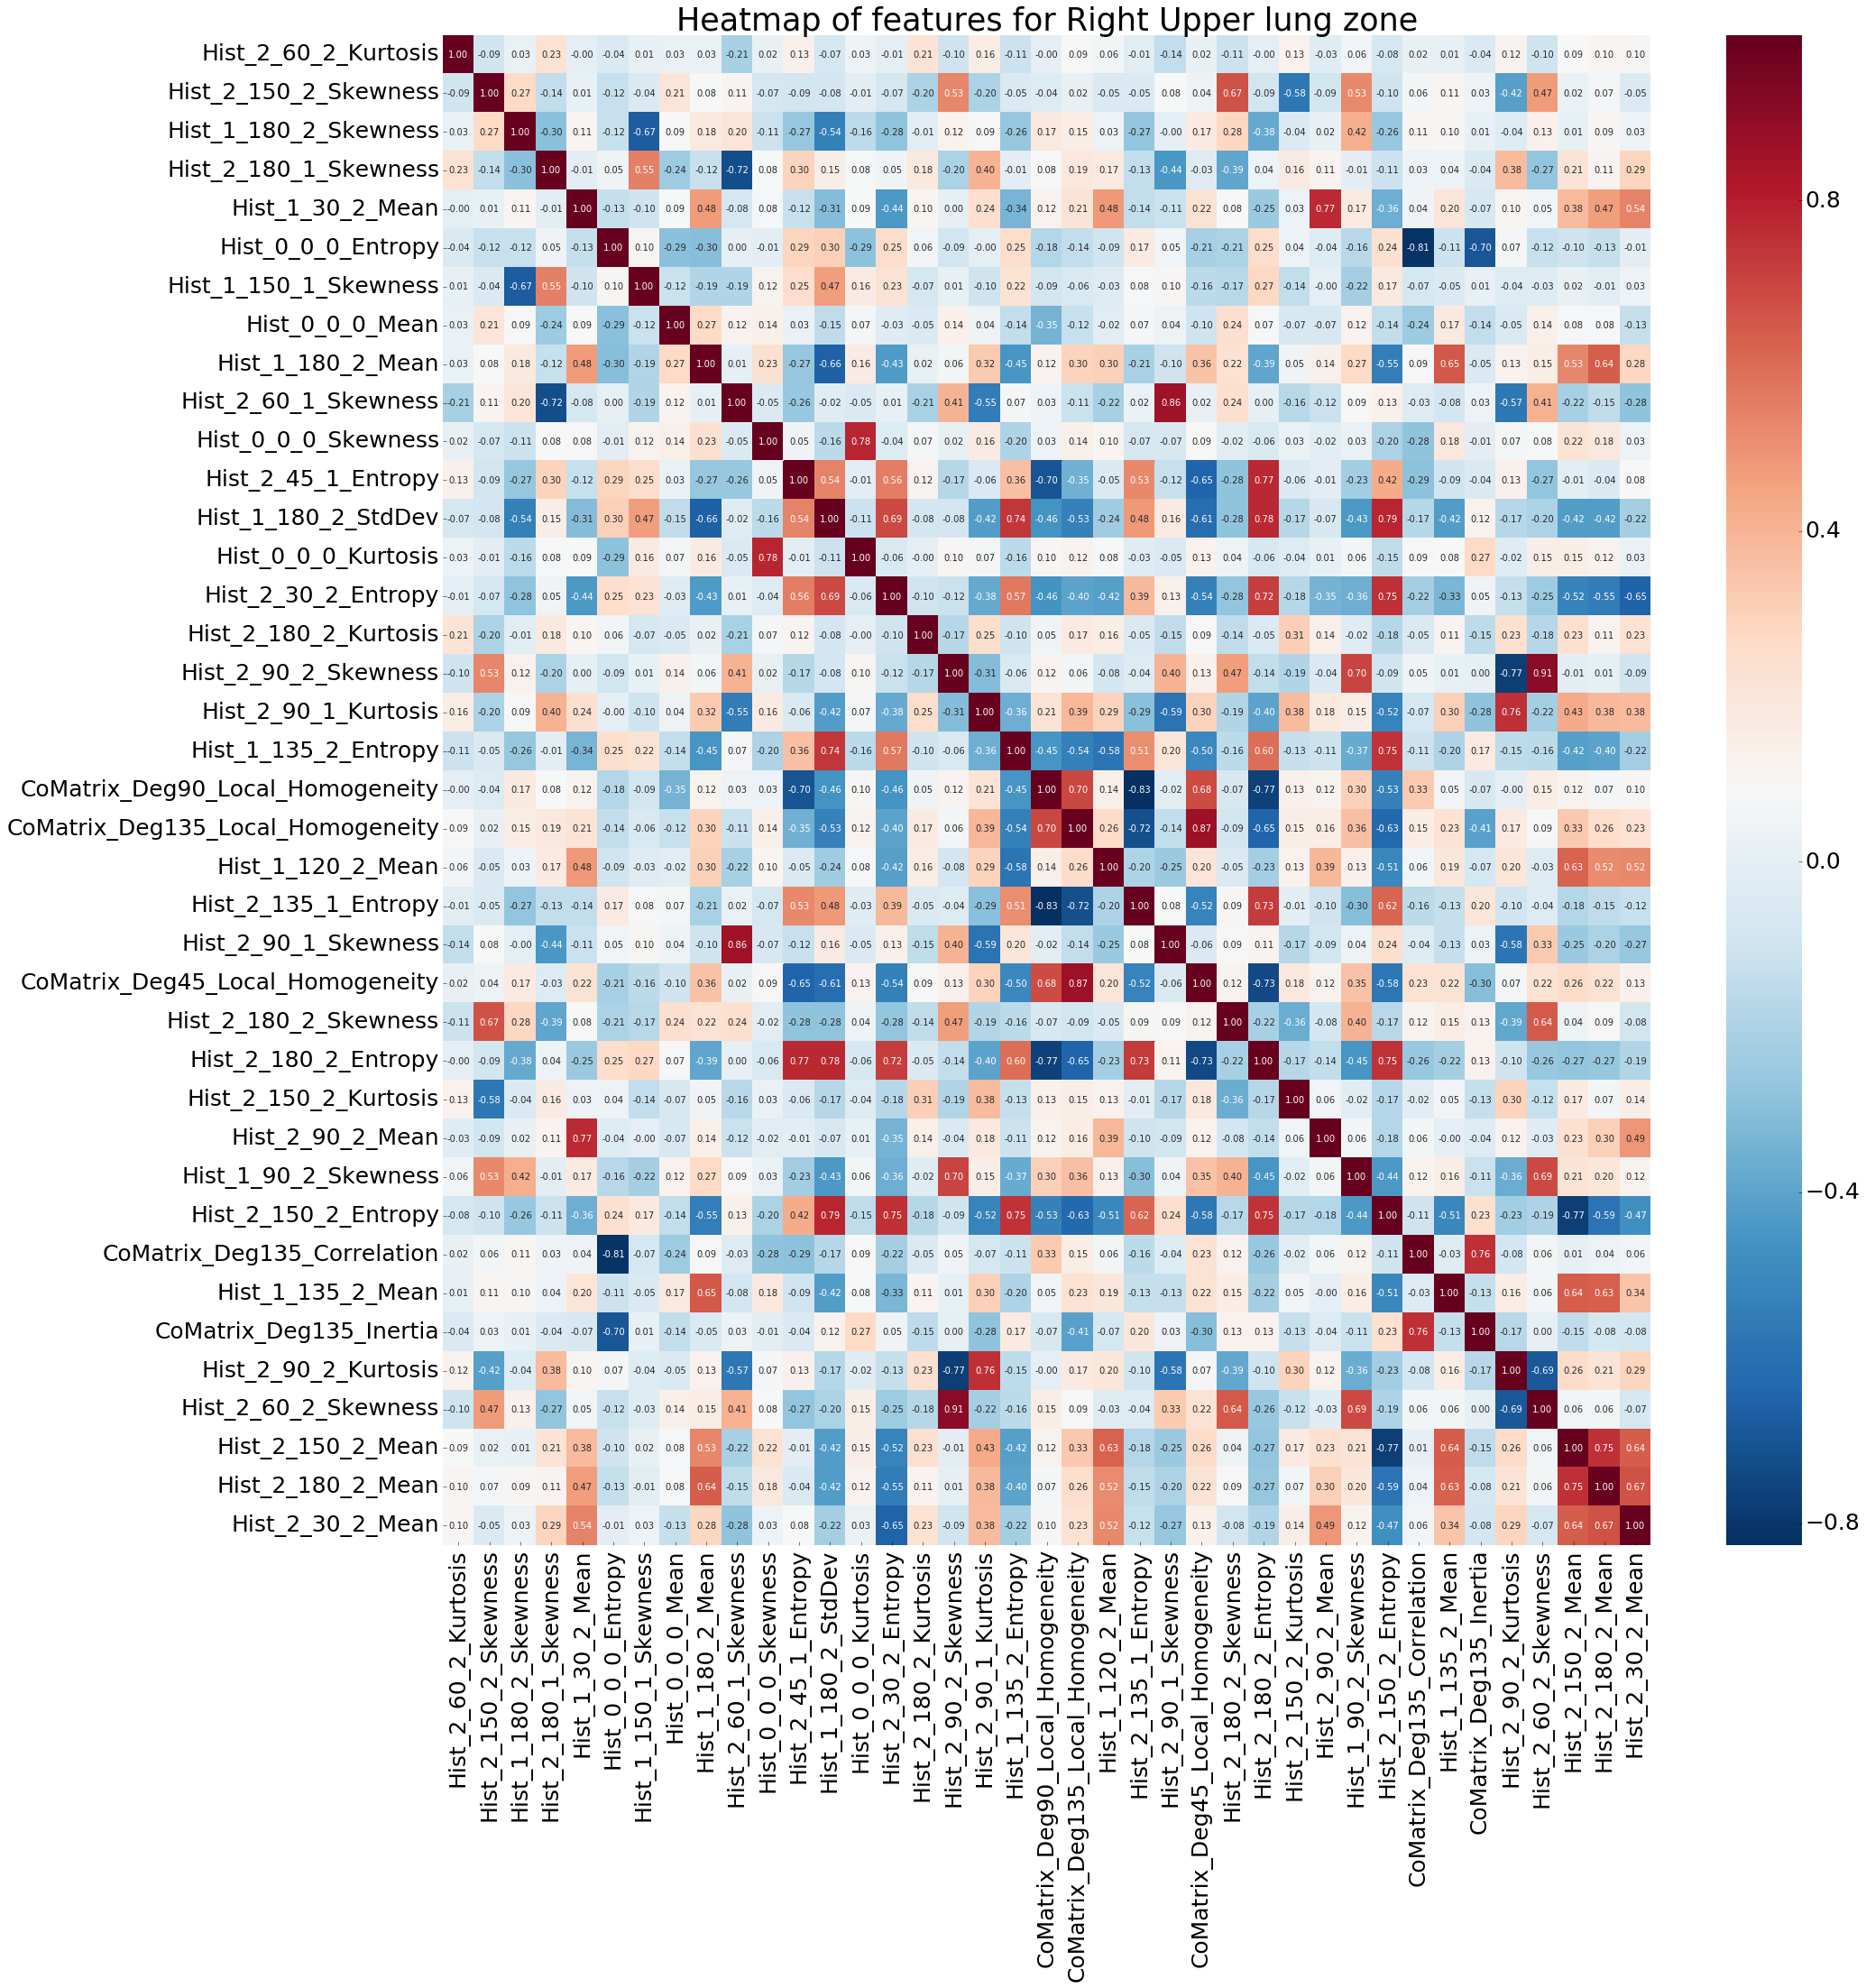

Table of features Pearson correlation coefficients (corr > 0.7) for  Right Upper  lung zone

                                                                    Correlation
Hist_2_60_2_Skewness             Hist_2_90_2_Skewness                  0.911587
CoMatrix_Deg45_Local_Homogeneity CoMatrix_Deg135_Local_Homogeneity     0.868217
Hist_2_90_1_Skewness             Hist_2_60_1_Skewness                  0.857986
Hist_2_135_1_Entropy             CoMatrix_Deg90_Local_Homogeneity      0.826262
CoMatrix_Deg135_Correlation      Hist_0_0_0_Entropy                    0.808721
Hist_2_150_2_Entropy             Hist_1_180_2_StdDev                   0.785259
Hist_0_0_0_Kurtosis              Hist_0_0_0_Skewness                   0.782385
Hist_2_180_2_Entropy             Hist_1_180_2_StdDev                   0.778346
Hist_2_150_2_Mean                Hist_2_150_2_Entropy                  0.774160
Hist_2_180_2_Entropy             Hist_2_45_1_Entropy                   0.773023
Hist_2_90_2_Kurtosis       

In [37]:
dict_zones = {'Right Upper': df_RU, 'Right Medium': df_RM, 'Righ Lower': df_RL,
             'Left Upper': df_LU, 'Left Medium': df_LM, 'Left Lower': df_LL}
columns_all = df_RU.columns.tolist()         #columns in every dataframe are the same
columns_keep = set(columns_all) - set(columns_to_exclude)

for key, value in dict_zones.items():
    df_hm = value[list(columns_keep)]
    cor = df_hm.corr()               #Pearson correlation coefficients
      
    fig = plt.figure(figsize=(30, 30))
    hm = sns.heatmap(cor, annot=True, fmt=".2f", cmap='RdBu_r')
    plt.title('Heatmap of features for '+key+' lung zone', fontsize=35)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=25)
    plt.show()
    
    cor = df_hm.corr().abs()
    mask = np.zeros_like(cor)
    mask[np.triu_indices_from(mask)] = True
    cor = cor*mask
    np.fill_diagonal(cor.values, -2)
    s = cor.unstack()
    s= s.sort_values(ascending=False)
    df_corr = pd.DataFrame(s, columns=['Correlation'])
    df_corr = df_corr.sort_values(by='Correlation', ascending=False)
    df_corr = df_corr[df_corr['Correlation']>0.7]
    print('Table of features Pearson correlation coefficients (corr > 0.7) for ',key,' lung zone\n')
    print(df_corr)

del dict_zones
del df_hm

###### Would be good to fix range for colorbar between heatmaps #######

## 3. Building model and predictions



### 3.1 

In [2]:
#Patient ids were removed to avoid data leakage

X_col = ['Hist_0_0_0_Mean', 'Hist_0_0_0_Skewness',
       'Hist_0_0_0_Kurtosis', 'Hist_0_0_0_Entropy', 'Hist_2_45_1_Entropy',
       'Hist_2_60_1_Skewness', 'Hist_2_90_1_Skewness', 'Hist_2_90_1_Kurtosis',
       'Hist_2_135_1_Entropy', 'Hist_1_150_1_Skewness',
       'Hist_2_180_1_Skewness', 'Hist_1_30_2_Mean', 'Hist_2_30_2_Mean',
       'Hist_2_30_2_Entropy', 'Hist_2_60_2_Skewness', 'Hist_2_60_2_Kurtosis',
       'Hist_1_90_2_Skewness', 'Hist_2_90_2_Mean', 'Hist_2_90_2_Skewness',
       'Hist_2_90_2_Kurtosis', 'Hist_1_120_2_Mean', 'Hist_1_135_2_Mean',
       'Hist_1_135_2_Entropy', 'Hist_2_150_2_Mean', 'Hist_2_150_2_Skewness',
       'Hist_2_150_2_Kurtosis', 'Hist_2_150_2_Entropy', 'Hist_1_180_2_Mean',
       'Hist_1_180_2_StdDev', 'Hist_1_180_2_Skewness', 'Hist_2_180_2_Mean',
       'Hist_2_180_2_Skewness', 'Hist_2_180_2_Kurtosis',
       'Hist_2_180_2_Entropy', 'CoMatrix_Deg45_Local_Homogeneity',
       'CoMatrix_Deg90_Local_Homogeneity', 'CoMatrix_Deg135_Local_Homogeneity',
       'CoMatrix_Deg135_Correlation', 'CoMatrix_Deg135_Inertia']
y_col = ['Label']

In [3]:
def treat_outliers(df, columns):
    from tqdm import tqdm_notebook
    for col in tqdm_notebook(df[columns].columns, total=len(df[columns].columns)):
        p25, p50, p75 = np.percentile(df[col], 0.25), np.percentile(df[col], 0.5), np.percentile(df[col], 0.75)
        iqr = p75 - p25
        #Labels 1
        df.loc[df.Label == 1, col] = np.where(df[df['Label']==1][col] > p75 + 100*iqr, p50, df[df['Label']==1][col])
        df.loc[df.Label == 1, col] = np.where(df[df['Label']==1][col] < p25 - 100*iqr, p50, df[df['Label']==1][col])
        #Labels0
        df.loc[df.Label == 0, col] = np.where(df[df['Label']==0][col] > p75 + 100*iqr, p50, df[df['Label']==0][col])
        df.loc[df.Label == 0, col] = np.where(df[df['Label']==0][col] < p25 - 100*iqr, p50, df[df['Label']==0][col])        
        
    return df

In [4]:
#Outliers reduction has meaningfull impact on score
import numpy as np
df_RU = treat_outliers(df_RU, X_col)
df_RM = treat_outliers(df_RM, X_col)
df_RL = treat_outliers(df_RL, X_col)

df_LU = treat_outliers(df_LU, X_col)
df_LM = treat_outliers(df_LM, X_col)
df_LL = treat_outliers(df_LL, X_col)

HBox(children=(IntProgress(value=0, max=39), HTML(value='')))

HBox(children=(IntProgress(value=0, max=39), HTML(value='')))

HBox(children=(IntProgress(value=0, max=39), HTML(value='')))

HBox(children=(IntProgress(value=0, max=39), HTML(value='')))

HBox(children=(IntProgress(value=0, max=39), HTML(value='')))

HBox(children=(IntProgress(value=0, max=39), HTML(value='')))

In [5]:
X_RU = df_RU[X_col]
X_RM = df_RM[X_col]
X_RL = df_RL[X_col]
X_LU = df_LU[X_col]
X_LM = df_LM[X_col]
X_LL = df_LL[X_col]

y_RU = df_RU[y_col]
y_RM = df_RM[y_col]
y_RL = df_RL[y_col]
y_LU = df_LU[y_col]
y_LM = df_LM[y_col]
y_LL = df_LL[y_col]

RU_ids = df_RU['PatientNumMasked'].values
RM_ids = df_RM['PatientNumMasked'].values
RL_ids = df_RL['PatientNumMasked'].values
LU_ids = df_LU['PatientNumMasked'].values
LM_ids = df_LM['PatientNumMasked'].values
LL_ids = df_LL['PatientNumMasked'].values

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm_notebook

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

loo = LeaveOneOut()
clf_rf = RandomForestClassifier(n_estimators=10, criterion='gini', min_samples_split=2, 
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                min_impurity_decrease=0.0, bootstrap=True)

predictions_rf = []

for train, test in tqdm_notebook(loo.split(X), total=len(y)):
    one = y.loc[test].index
    rest = y.loc[train].index

    X_test_loo = X.loc[one]
    X_train_loo = X.loc[rest]
    y_test_loo = y.loc[one]
    y_train_loo = y.loc[rest]
    
    clf_rf.fit(X_train_loo, y_train_loo.values.ravel())
    predictions_rf.append(clf_rf.predict(X_test_loo)[0])
    
predictions_rf = np.array(predictions_rf).reshape(len(y),1)    
    
print('Precission score: ', precision_score(y, predictions_rf))
print('Accuracy score: ', accuracy_score(y, predictions_rf))
print('Recall score: ', recall_score(y, predictions_rf))

#Default
#Precission score:  0.9108910891089109
#Accuracy score:  0.9183673469387755
#Recall score:  0.8

In [ ]:
import xgboost
from tqdm import tqdm_notebook
#import warnings
#warnings.filterwarnings("ignore")

loo = LeaveOneOut()

clf_xgb = xgboost.XGBClassifier(n_jobs=4, n_estimators=500)

predictions_xgb = []

for train, test in tqdm_notebook(loo.split(X), total=len(y)):
    one = y.loc[test].index
    rest = y.loc[train].index

    X_test_loo = X.loc[one]
    X_train_loo = X.loc[rest]
    y_test_loo = y.loc[one]
    y_train_loo = y.loc[rest]
    clf_xgb.fit(X_train_loo, y_train_loo.values.ravel())
    predictions_xgb.append(clf_xgb.predict(X_test_loo)[0])
    
predictions_xgb = np.array(predictions_xgb).reshape(len(y),1)

print('Precission score: ',precision_score(y, predictions_xgb))
print('Accuracy score: ', accuracy_score(y, predictions_xgb))
print('Recall score: ', recall_score(y, predictions_xgb))

#default
#Precission score:  0.9150943396226415
#Accuracy score:  0.9311224489795918
#Recall score:  0.8434782608695652

#For 1000 trees
#Precission score:  0.9245283018867925
#Accuracy score:  0.9362244897959183
#Recall score:  0.8521739130434782

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from xgboost.sklearn import XGBClassifier
import xgboost
import numpy as np
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(
    df_LL[X_col], df_LL[y_col], test_size=0.33, random_state=42)

#grid_values = {'n_jobs': [4],
#               'n_estimators': [500],
#               'max_depth': np.arange(1, 6, 1),
#               'learning_rate': np.arange(0.1, 0.9, 0.1),
#               'gamma': np.arange(0, 0.05, 0.01),
#               'max_delta_step': np.arange(0, 0.05, 0.01),
#               'reg_alpha': np.arange(0, 0.5, 0.1),
#               'reg_lambda': np.arange(0.5, 1, 0.1),
#               'scale_pos_weight': np.arange(0.5, 1, 0.1)}

grid_values = {'n_jobs': [4],
               'n_estimators': [500],
               'max_depth': np.arange(1, 6, 1)}
               

clf_xgb = XGBClassifier()
grid_clf_recall = GridSearchCV(clf_xgb, param_grid=grid_values)
grid_clf_recall.fit(X_train, y_train)

y_xgb_recall = grid_clf_recall.decision_function(X_test)
print('Best Recall: ', recall_score(y_test, y_xgb_recall))
print('Best parameters: ', grid_clf_recall.best_params_)

In [6]:
def xgb_predictions(X, y):
    import xgboost
    from sklearn.model_selection import LeaveOneOut
    from tqdm import tqdm_notebook
    import warnings
    warnings.filterwarnings("ignore")
    
    loo = LeaveOneOut()

    clf_xgb = xgboost.XGBClassifier(learning_rate =0.1,
                                     n_estimators=500,
                                     max_depth=5,
                                     min_child_weight=1,
                                     gamma=0,
                                     subsample=0.8,
                                     colsample_bytree=0.8,
                                     objective= 'binary:logistic',
                                     nthread=4,
                                     scale_pos_weight=1,
                                     seed=27)

    predictions_xgb = []

    for train, test in tqdm_notebook(loo.split(X), total=len(y)):
        one = y.loc[test].index
        rest = y.loc[train].index

        X_test_loo = X.loc[one]
        X_train_loo = X.loc[rest]
        y_test_loo = y.loc[one]
        y_train_loo = y.loc[rest]
        clf_xgb.fit(X_train_loo, y_train_loo.values.ravel())
        predictions_xgb.append(clf_xgb.predict(X_test_loo)[0])
    
    return np.array(predictions_xgb).reshape(len(y),1)

In [7]:
predictions_RU = xgb_predictions(X_RU, y_RU).reshape((len(y_RU),))
predictions_RM = xgb_predictions(X_RM, y_RM).reshape((len(y_RM),))
predictions_RL = xgb_predictions(X_RL, y_RL).reshape((len(y_RL),))
predictions_LR = xgb_predictions(X_LU, y_LU).reshape((len(y_LU),))
predictions_LM = xgb_predictions(X_LM, y_LM).reshape((len(y_LM),))
predictions_LL = xgb_predictions(X_LL, y_LL).reshape((len(y_LL),))

HBox(children=(IntProgress(value=0, max=397), HTML(value='')))

HBox(children=(IntProgress(value=0, max=470), HTML(value='')))

HBox(children=(IntProgress(value=0, max=446), HTML(value='')))

HBox(children=(IntProgress(value=0, max=392), HTML(value='')))

HBox(children=(IntProgress(value=0, max=467), HTML(value='')))

HBox(children=(IntProgress(value=0, max=434), HTML(value='')))

In [8]:
predictions_RU = predictions_RU.reshape((len(y_RU),))
predictions_RM = predictions_RM.reshape((len(y_RM),))
predictions_RL = predictions_RL.reshape((len(y_RL),))
predictions_LU = predictions_LR.reshape((len(y_LU),))
predictions_LM = predictions_LM.reshape((len(y_LM),))
predictions_LL = predictions_LL.reshape((len(y_LL),))

y_RU = y_RU.values.reshape((len(y_RU),))
y_RM = y_RM.values.reshape((len(y_RM),))
y_RL = y_RL.values.reshape((len(y_RL),))
y_LU = y_LU.values.reshape((len(y_LU),))
y_LM = y_LM.values.reshape((len(y_LM),))
y_LL = y_LL.values.reshape((len(y_LL),))

In [9]:
df_RU_pred = pd.DataFrame({'y_pred_RU': predictions_RU, 'y_true_RU': y_RU}, index=RU_ids)
df_RM_pred = pd.DataFrame({'y_pred_RM': predictions_RM, 'y_true_RM': y_RM}, index=RM_ids)
df_RL_pred = pd.DataFrame({'y_pred_RL': predictions_RL, 'y_true_RL': y_RL}, index=RL_ids)
df_LU_pred = pd.DataFrame({'y_pred_LU': predictions_LU, 'y_true_LU': y_LU}, index=LU_ids)
df_LM_pred = pd.DataFrame({'y_pred_LM': predictions_LM, 'y_true_LM': y_LM}, index=LM_ids)
df_LL_pred = pd.DataFrame({'y_pred_LL': predictions_LL, 'y_true_LL': y_LL}, index=LL_ids)

In [10]:
df_ensemble = df_RU_pred.merge(df_RM_pred, how='outer', right_index=True, left_index=True)
df_ensemble = df_ensemble.merge(df_RL_pred, how='outer', right_index=True, left_index=True)
df_ensemble = df_ensemble.merge(df_LU_pred, how='outer', right_index=True, left_index=True)
df_ensemble = df_ensemble.merge(df_LM_pred, how='outer', right_index=True, left_index=True)
df_ensemble = df_ensemble.merge(df_LL_pred, how='outer', right_index=True, left_index=True)
df_ensemble['y_pred'] = np.sum(df_ensemble[['y_pred_RU','y_pred_RM','y_pred_RL',
                                        'y_pred_LU', 'y_pred_LM', 'y_pred_LL']], axis=1)
df_ensemble['y_true'] = np.sum(df_ensemble[['y_true_RU','y_true_RM','y_true_RL',
                                        'y_true_LU', 'y_true_LM', 'y_true_LL']], axis=1)

df_ensemble.loc[df_ensemble['y_pred'] > 0, 'y_pred'] = 1
df_ensemble.loc[df_ensemble['y_true'] > 0, 'y_true'] = 1
df_ensemble[(df_ensemble['y_true']==1) & (df_ensemble['y_pred']==0)]

y_pred_RU  y_true_RU  y_pred_RM  y_true_RM  y_pred_RL  y_true_RL  \
42         0.0        1.0        0.0        1.0        0.0        1.0   
59         NaN        NaN        0.0        1.0        0.0        1.0   
77         NaN        NaN        NaN        NaN        0.0        1.0   
79         NaN        NaN        0.0        1.0        NaN        NaN   
94         0.0        1.0        0.0        1.0        NaN        NaN   
131        NaN        NaN        0.0        1.0        0.0        1.0   
132        NaN        NaN        0.0        1.0        NaN        NaN   
136        NaN        NaN        0.0        1.0        NaN        NaN   
137        NaN        NaN        0.0        1.0        NaN        NaN   
138        0.0        1.0        0.0        1.0        NaN        NaN   
142        NaN        NaN        0.0        1.0        0.0        1.0   
143        NaN        NaN        0.0        1.0        NaN        NaN   
147        NaN        NaN        0.0        1.0        NaN        NaN   
153        0.0        1.0        0.0        1.0        0.0        1.0   

     y_pred_LU  y_true_LU  y_pred_LM  y_true_LM  y_pred_LL  y_true_LL  y_pred  \
42         0.0        1.0        0.0        1.0        0.0        1.0     0.0   
59         NaN        NaN        0.0        1.0        0.0        1.0     0.0   
77         NaN        NaN        NaN        NaN        NaN        NaN     0.0   
79         NaN        NaN        0.0        1.0        NaN        NaN     0.0   
94         0.0        1.0        0.0        1.0        NaN        NaN     0.0   
131        NaN        NaN        NaN        NaN        0.0        1.0     0.0   
132        NaN        NaN        0.0        1.0        NaN        NaN     0.0   
136        NaN        NaN        0.0        1.0        NaN        NaN     0.0   
137        NaN        NaN        0.0        1.0        NaN        NaN     0.0   
138        0.0        1.0        0.0        1.0        NaN        NaN     0.0   
142        NaN        NaN        0.0        1.0        NaN        NaN     0.0   
143        NaN        NaN        0.0        1.0        NaN        NaN     0.0   
147        NaN        NaN        0.0        1.0        NaN        NaN     0.0   
153        0.0        1.0        0.0        1.0        0.0        1.0     0.0   

     y_true  
42      1.0  
59      1.0  
77      1.0  
79      1.0  
94      1.0  
131     1.0  
132     1.0  
136     1.0  
137     1.0  
138     1.0  
142     1.0  
143     1.0  
147     1.0  
153     1.0

In [11]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

print('Precission score: ',precision_score(df_ensemble['y_true'], df_ensemble['y_pred']))
print('Accuracy score: ', accuracy_score(df_ensemble['y_true'], df_ensemble['y_pred']))
print('Recall score: ', recall_score(df_ensemble['y_true'], df_ensemble['y_pred']))

#First shot
#Precission score:  0.8
#Accuracy score:  0.8710359408033826
#Recall score:  0.9183673469387755

Precission score:  0.7982456140350878
Accuracy score:  0.8731501057082452
Recall score:  0.9285714285714286




ideas: 
- heatmap: add table with feature pairs that corr>0.7
- Dimmensionality reduction: https://en.wikipedia.org/wiki/Principal_component_analysis 




Sections:
- Introduction
- methods
- results
- conclusions

include discussion of the data used, exploratory analysis, model type(s) identification, estimation, diagnosis, validation, and recomendations. 

In [ ]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = df_RL
target = 'Label'
IDcol = 'PatientNumMasked'

In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Label'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.precision_score(dtrain['Label'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.recall_score(dtrain['Label'], dtrain_predprob))
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, df_RL, predictors)

In [ ]:
import catboost
from tqdm import tqdm_notebook

precision_cb = []
accuracy_cb = []
recall_cb = []
predictions_cb = []

clf_cb = catboost.CatBoostClassifier(thread_count=4, logging_level='Silent')

for train, test in tqdm_notebook(loo.split(X), total=len(y)):
    one = y.loc[test].index
    rest = y.loc[train].index

    X_test_loo = X.loc[one]
    X_train_loo = X.loc[rest]
    y_test_loo = y.loc[one]
    y_train_loo = y.loc[rest]
    
    clf_cb.fit(X_train_loo, y_train_loo.values.ravel())
    predictions_cb.append(clf_cb.predict(X_test_loo)[0])
    
predictions_cb = np.array(predictions_cb).reshape(len(y),1)

print('Precission score: ',precision_score(y, predictions_cb))
print('Accuracy score: ', accuracy_score(y, predictions_cb))
print('Recall score: ', recall_score(y, predictions_cb))

In [ ]:
xgb.cv?